In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("final_cleaned_data.csv")
df

Biomass                Type  Moisture content (% wb)  \
0           Woody biomass  Douglas fir chips                      13.0   
1           Woody biomass  Douglas fir chips                      13.0   
2           Woody biomass  Douglas fir chips                      13.0   
3           Woody biomass  Douglas fir chips                      13.0   
4           Woody biomass  Douglas fir chips                      13.0   
..                    ...                 ...                      ...   
310  Agricultural residue          Corn stalk                     14.0   
311  Agricultural residue          Corn stalk                     14.0   
312  Agricultural residue          Corn stalk                     14.0   
313  Agricultural residue          Corn stalk                     14.0   
314  Agricultural residue          Corn stalk                     14.0   

     Initial avg. particle size, (mm) In-feed Seive Size (mm)  \
0                               10.36                     NaN   
1                               10.36                     NaN   
2                               10.36                     NaN   
3                               10.36                     NaN   
4                               10.36                     NaN   
..                                ...                     ...   
310                             40.00                     NaN   
311                             40.00                     NaN   
312                             40.00                     NaN   
313                             40.00                     NaN   
314                             40.00                     NaN   

     Volatile Matter (%)  Ash (%)  Energy content (MJ/kg) Grinder type  \
0                    NaN      NaN                     NaN  Hammer mill   
1                    NaN      NaN                     NaN  Hammer mill   
2                    NaN      NaN                     NaN  Hammer mill   
3                    NaN      NaN                     NaN   Knife mill   
4                    NaN      NaN                     NaN   Knife mill   
..                   ...      ...                     ...          ...   
310                  NaN      NaN                     NaN     Lab Mill   
311                  NaN      NaN                     NaN     Lab Mill   
312                  NaN      NaN                     NaN     Lab Mill   
313                  NaN      NaN                     NaN     Lab Mill   
314                  NaN      NaN                     NaN     Lab Mill   

     Motor size, kW  Screen size, mm  Grinding Rate (Mg/h)  Feed rate (g/s)  \
0              14.9             6.35                   NaN              7.1   
1              14.9             3.18                   NaN              3.9   
2              14.9             0.79                   NaN              2.3   
3               3.7             6.35                   NaN              3.0   
4               3.7             4.76                   NaN              2.3   
..              ...              ...                   ...              ...   
310             0.9              NaN                   NaN              NaN   
311             0.9              NaN                   NaN              NaN   
312             0.9              NaN                   NaN              NaN   
313             0.9              NaN                   NaN              NaN   
314             0.9              NaN                   NaN              NaN   

     Sp. Grinding energy, kJ/kg  Final particle size (mm)  
0                          95.0                      1.49  
1                         141.0                      1.02  
2                         328.0                      0.65  
3                         153.0                      2.66  
4                         205.0                      1.94  
..                          ...                       ...  
310                      2310.0                       NaN  
311                      1680.

In [47]:
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/197485208.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [15]:
df.isnull().sum()

Biomass                               0
Type                                  0
Moisture content (% wb)               0
Initial avg. particle size, (mm)    125
In-feed Seive Size (mm)             269
Volatile Matter (%)                 307
Ash (%)                             284
Energy content (MJ/kg)              284
Grinder type                          0
Motor size, kW                       10
Screen size, mm                      34
Grinding Rate (Mg/h)                291
Feed rate (g/s)                     215
Sp. Grinding energy, kJ/kg           11
Final particle size (mm)            102
dtype: int64

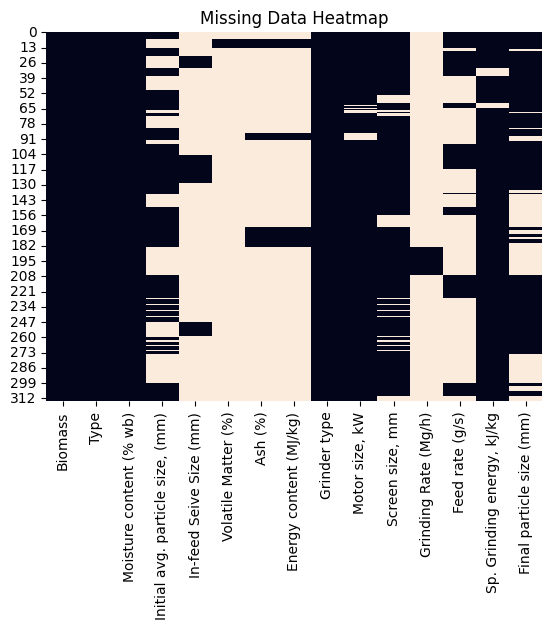

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [40]:
df[df["Grinder type"] == "TUB GRINDER"]

Empty DataFrame
Columns: [Biomass, Type, Moisture content (% wb), Initial avg. particle size, (mm), In-feed Seive Size (mm), Volatile Matter (%), Ash (%), Energy content (MJ/kg), Grinder type, Motor size, kW, Screen size, mm, Grinding Rate (Mg/h), Feed rate (g/s), Sp. Grinding energy, kJ/kg, Final particle size (mm)]
Index: []

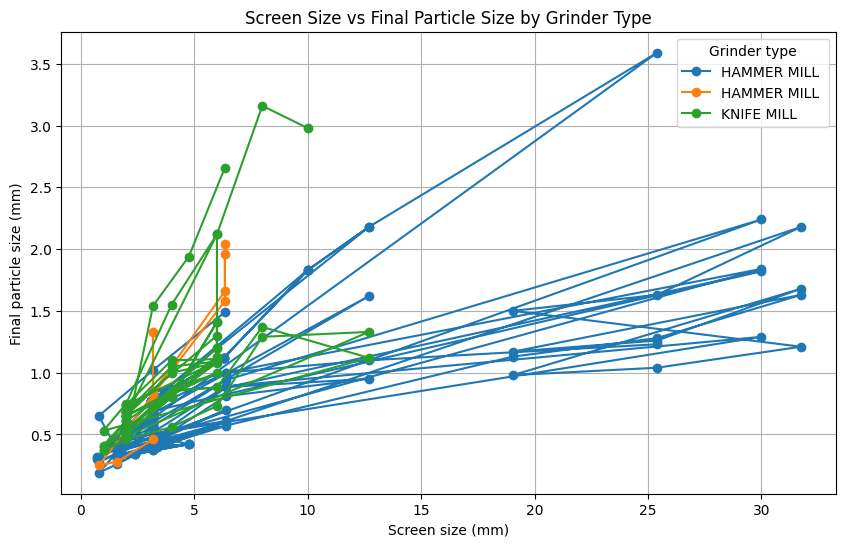

In [16]:
# Drop rows where required columns are missing
plot_df = df.dropna(subset=["Screen size, mm", "Final particle size (mm)", "Grinder type"])

# Plot by grinder type
plt.figure(figsize=(10,6))

for grinder, sub_df in plot_df.groupby("Grinder type"):
    plt.plot(sub_df["Screen size, mm"], sub_df["Final particle size (mm)"], 
             marker='o', linestyle='-', label=grinder)

plt.xlabel("Screen size (mm)")
plt.ylabel("Final particle size (mm)")
plt.title("Screen Size vs Final Particle Size by Grinder Type")
plt.legend(title="Grinder type")
plt.grid(True)
plt.show()

In [9]:
import re
import pandas as pd

def standardize_grinder(value: str) -> str:
    """
    Cleans and standardises grinder type names.
    """
    if pd.isna(value):
        return value
    
    # Step 1: lowercase
    val = value.lower()
    
    # Step 2: remove special chars ((), -, /, etc.)
    val = re.sub(r"[\(\)\-/_]", " ", val)
    
    # Step 3: normalize spaces
    val = re.sub(r"\s+", " ", val).strip()
    
    # Step 4: dictionary mapping
    mapping = {
        "hammer mill": "Hammer Mill",
        "hammermill": "Hammer Mill",
        "Hammre Mill": "Hammer Mill",
        "knife mill": "Knife Mill",
        "knifemill": "Knife Mill",
        "rotor impact mill": "Rotor Impact Mill",
        "ring roller mill": "Ring Roller Mill",
        "lab mill": "Lab Mill",
        "who tub grinder": "Tub Grinder",
        "medallion tub grinder": "Tub Grinder",
        "tub grinder": "Tub Grinder",
        "chopper": "Chopper"
    }
    
    return mapping.get(val, val.title())  # fallback: clean title case


In [12]:
import re
import pandas as pd

def standardize_grinder(value: str) -> str:
    """
    Cleans and standardises grinder type names.
    """
    if pd.isna(value):
        return value
    
    # Step 1: lowercase
    val = value.lower()
    
    # Step 2: remove special chars ((), -, /, etc.)
    val = re.sub(r"[\(\)\-/_]", " ", val)
    
    # Step 3: normalize spaces
    val = re.sub(r"\s+", " ", val).strip()
    
    # Step 4: dictionary mapping (all lowercase keys!)
    mapping = {
        "hammer mill": "Hammer Mill",
        "hammermill": "Hammer Mill",
        "hammre mill": "Hammer Mill",
        "knife mill": "Knife Mill",
        "knifemill": "Knife Mill",
        "rotor impact mill": "Rotor Impact Mill",
        "ring roller mill": "Ring Roller Mill",
        "lab mill": "Lab Mill",
        "tub grinder": "Tub Grinder",
        "who tub grinder": "Tub Grinder",
        "medallion tub grinder": "Tub Grinder",
        "chopper": "Chopper",
    }
    
    # Standardise if known, else return cleaned text
    return mapping.get(val, val.title())


In [13]:
df["Grinder type"] = df["Grinder type"].apply(standardize_grinder)
df

Biomass                Type  Moisture content (% wb)  \
0           Woody biomass  Douglas fir chips                      13.0   
1           Woody biomass  Douglas fir chips                      13.0   
2           Woody biomass  Douglas fir chips                      13.0   
3           Woody biomass  Douglas fir chips                      13.0   
4           Woody biomass  Douglas fir chips                      13.0   
..                    ...                 ...                      ...   
310  Agricultural residue          Corn stalk                     14.0   
311  Agricultural residue          Corn stalk                     14.0   
312  Agricultural residue          Corn stalk                     14.0   
313  Agricultural residue          Corn stalk                     14.0   
314  Agricultural residue          Corn stalk                     14.0   

     Initial avg. particle size, (mm) In-feed Seive Size (mm)  \
0                               10.36                     NaN   
1                               10.36                     NaN   
2                               10.36                     NaN   
3                               10.36                     NaN   
4                               10.36                     NaN   
..                                ...                     ...   
310                             40.00                     NaN   
311                             40.00                     NaN   
312                             40.00                     NaN   
313                             40.00                     NaN   
314                             40.00                     NaN   

     Volatile Matter (%)  Ash (%)  Energy content (MJ/kg) Grinder type  \
0                    NaN      NaN                     NaN  Hammer Mill   
1                    NaN      NaN                     NaN  Hammer Mill   
2                    NaN      NaN                     NaN  Hammer Mill   
3                    NaN      NaN                     NaN   Knife Mill   
4                    NaN      NaN                     NaN   Knife Mill   
..                   ...      ...                     ...          ...   
310                  NaN      NaN                     NaN     Lab Mill   
311                  NaN      NaN                     NaN     Lab Mill   
312                  NaN      NaN                     NaN     Lab Mill   
313                  NaN      NaN                     NaN     Lab Mill   
314                  NaN      NaN                     NaN     Lab Mill   

     Motor size, kW  Screen size, mm  Grinding Rate (Mg/h)  Feed rate (g/s)  \
0              14.9             6.35                   NaN              7.1   
1              14.9             3.18                   NaN              3.9   
2              14.9             0.79                   NaN              2.3   
3               3.7             6.35                   NaN              3.0   
4               3.7             4.76                   NaN              2.3   
..              ...              ...                   ...              ...   
310             0.9              NaN                   NaN              NaN   
311             0.9              NaN                   NaN              NaN   
312             0.9              NaN                   NaN              NaN   
313             0.9              NaN                   NaN              NaN   
314             0.9              NaN                   NaN              NaN   

     Sp. Grinding energy, kJ/kg  Final particle size (mm)  
0                          95.0                      1.49  
1                         141.0                      1.02  
2                         328.0                      0.65  
3                         153.0                      2.66  
4                         205.0                      1.94  
..                          ...                       ...  
310                      2310.0                       NaN  
311                      1680.

In [14]:
df["Grinder type"].value_counts()

Grinder type
Hammer Mill          197
Knife Mill            63
Tub Grinder           24
Lab Mill              15
Chopper                8
Rotor Impact Mill      7
Ring Roller Mill       1
Name: count, dtype: int64

In [9]:
df["Biomass"].value_counts()

Biomass
Agricultural residue    149
Energy crops             84
Woody biomass            82
Name: count, dtype: int64

In [10]:
df['Type'].value_counts() 

Type
Wheat straw              44
Switch grass             32
Corn stover              29
Miscanthus               18
Alfalfa                  17
Canola straw             15
Pine Chips               15
Willow                   14
Barley straw             14
Douglas fir chips        10
Douglas fir FHRs         10
Oat straw                 9
Rice straw                8
Loblolly pine             8
Douglass fir branches     7
Pine branches             5
Mountain Grass            5
Corn stalk                5
Poplar branches           5
Aspen branches            5
Willow Chips              4
Bagasse                   4
Sunflower seed husk       4
Sorghum seeds             3
Poplar                    3
Barley straw (SE)         3
Canola straw (SE)         3
Oat straw (SE)            3
Wheat straw (SE)          3
Energy cane               2
Olive residue             2
Hardwood                  2
Willow                    1
Pine chips                1
Aspen                     1
Pine bark      

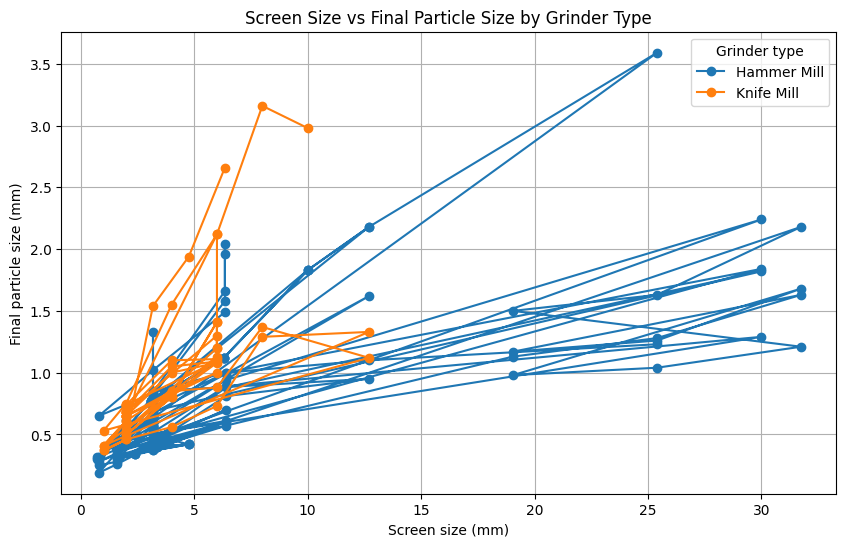

In [12]:
plot_df = df.dropna(subset=["Screen size, mm", "Final particle size (mm)", "Grinder type"])

# Plot by grinder type
plt.figure(figsize=(10,6))

for grinder, sub_df in plot_df.groupby("Grinder type"):
    plt.plot(sub_df["Screen size, mm"], sub_df["Final particle size (mm)"], 
             marker='o', linestyle='-', label=grinder)

plt.xlabel("Screen size (mm)")
plt.ylabel("Final particle size (mm)")
plt.title("Screen Size vs Final Particle Size by Grinder Type")
plt.legend(title="Grinder type")
plt.grid(True)
plt.show()

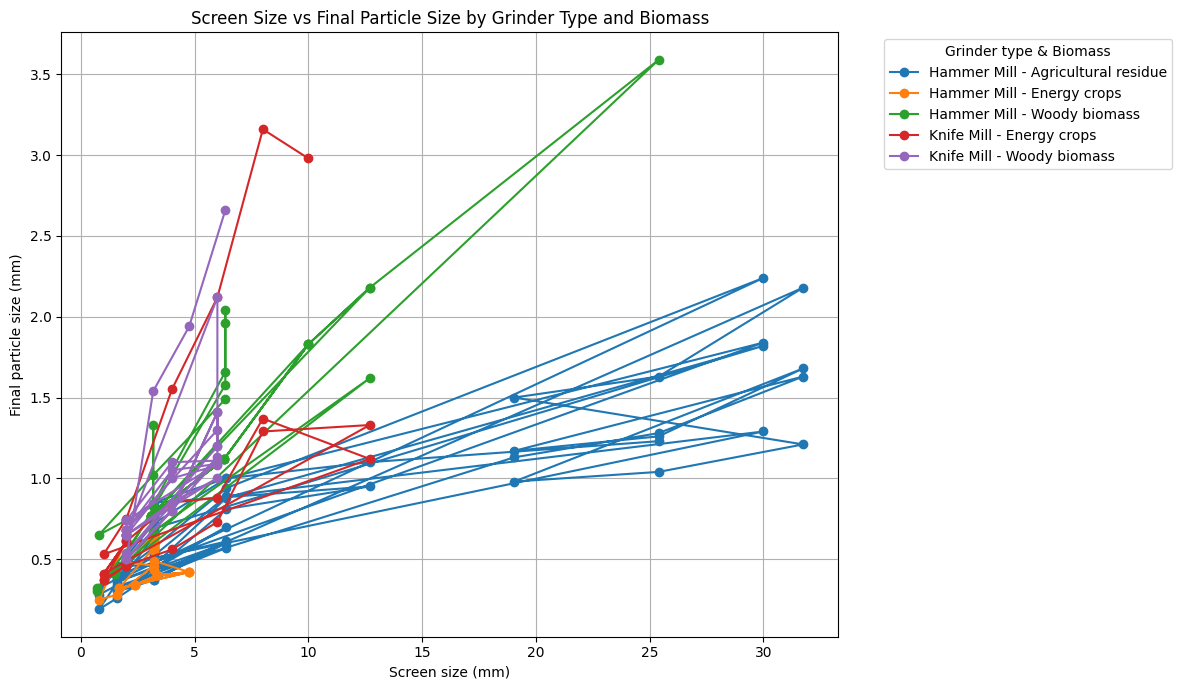

In [21]:
plot_df = df.dropna(subset=["Screen size, mm", "Final particle size (mm)", "Grinder type", "Biomass"])

# Plot by grinder type and biomass
plt.figure(figsize=(12, 7))

for (grinder, biomass), sub_df in plot_df.groupby(["Grinder type", "Biomass"]):
    plt.plot(sub_df["Screen size, mm"], sub_df["Final particle size (mm)"], 
             marker='o', linestyle='-', label=f"{grinder} - {biomass}")

plt.xlabel("Screen size (mm)")
plt.ylabel("Final particle size (mm)")
plt.title("Screen Size vs Final Particle Size by Grinder Type and Biomass")
plt.legend(title="Grinder type & Biomass", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


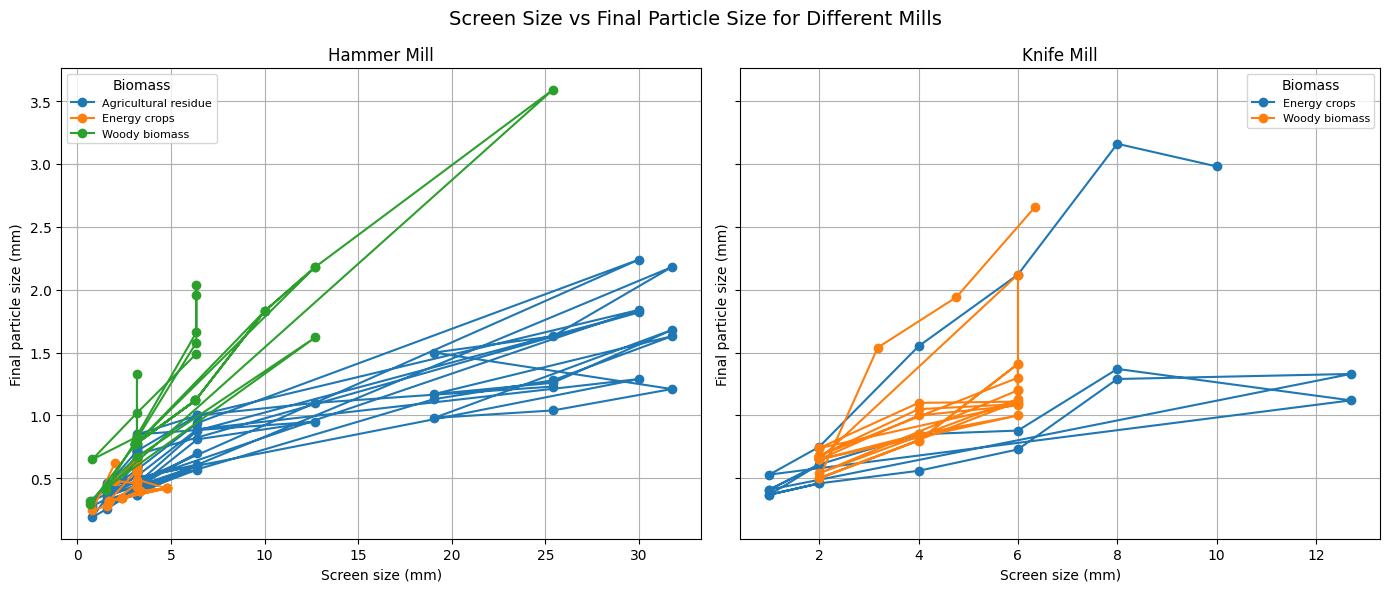

In [15]:
plot_df = df.dropna(subset=["Screen size, mm", "Final particle size (mm)", "Grinder type", "Biomass"])

# Choose two grinder types to compare
mills_to_plot = ["Hammer Mill", "Knife Mill"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # side-by-side plots

for ax, mill in zip(axes, mills_to_plot):
    sub_df_mill = plot_df[plot_df["Grinder type"] == mill]
    
    for biomass, sub_df in sub_df_mill.groupby("Biomass"):
        ax.plot(sub_df["Screen size, mm"], sub_df["Final particle size (mm)"], 
                marker='o', linestyle='-', label=biomass)
    
    ax.set_title(f"{mill}")
    ax.set_xlabel("Screen size (mm)")
    ax.set_ylabel("Final particle size (mm)")
    ax.legend(title="Biomass", fontsize=8)
    ax.grid(True)

plt.suptitle("Screen Size vs Final Particle Size for Different Mills", fontsize=14)
plt.tight_layout()
plt.show()


In [41]:
df.groupby("Grinder type")[["Screen size, mm", "Final particle size (mm)"]].count()


Screen size, mm  Final particle size (mm)
Grinder type                                                      
CHOPPER                                0                         8
HAMMER MILL                          195                       137
KNIFE MILL                            61                        59
KNIFE MILL                             1                         1
LAB MILL                               0                         0
MEDALLION (TUB) GRINDER                4                         0
RING ROLLER MILL                       0                         1
ROTOR IMPACT MILL                      0                         7
WHO (TUB) GRINDER                     20                         0

In [42]:
df.groupby("Grinder type")[["Moisture content (% wb)", "Final particle size (mm)"]].count()

Moisture content (% wb)  Final particle size (mm)
Grinder type                                                              
CHOPPER                                        8                         8
HAMMER MILL                                  197                       137
KNIFE MILL                                    61                        59
KNIFE MILL                                     2                         1
LAB MILL                                      15                         0
MEDALLION (TUB) GRINDER                        4                         0
RING ROLLER MILL                               1                         1
ROTOR IMPACT MILL                              7                         7
WHO (TUB) GRINDER                             20                         0

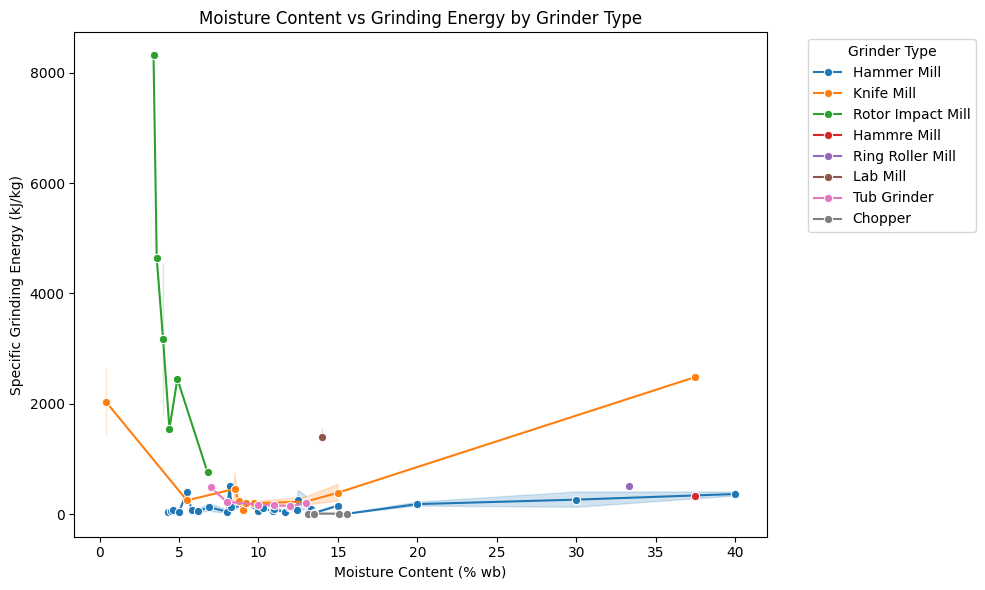

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is df

# Drop rows where moisture or energy is missing
plot_df = df.dropna(subset=["Moisture content (% wb)", "Sp. Grinding energy, kJ/kg"])

plt.figure(figsize=(10, 6))

# Lineplot with different colors for Grinder type
sns.lineplot(
    data=plot_df,
    x="Moisture content (% wb)",
    y="Sp. Grinding energy, kJ/kg",
    hue="Grinder type",
    marker="o"
)

plt.title("Moisture Content vs Grinding Energy by Grinder Type")
plt.xlabel("Moisture Content (% wb)")
plt.ylabel("Specific Grinding Energy (kJ/kg)")
plt.legend(title="Grinder Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


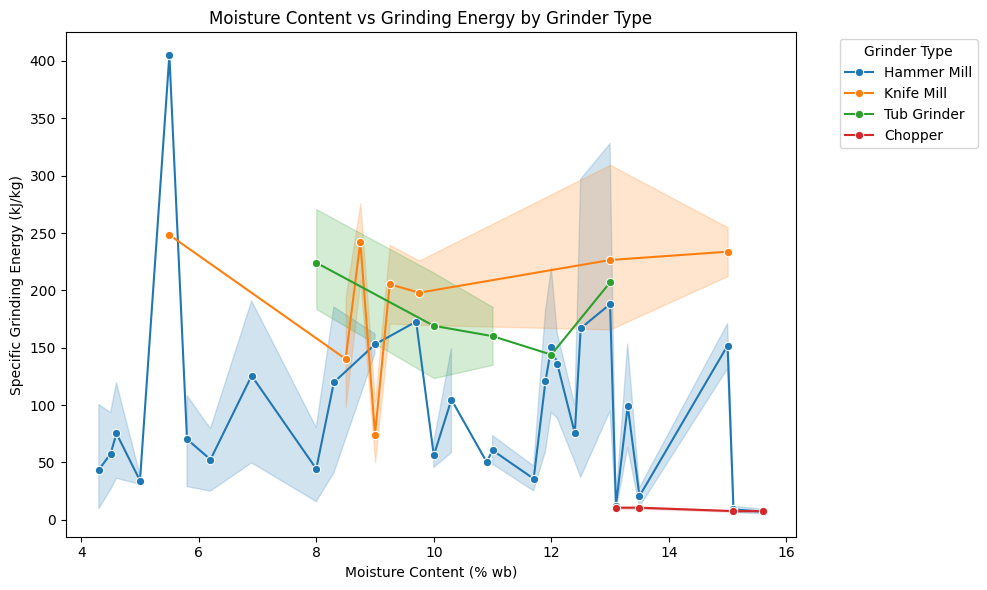

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where moisture or energy is missing
plot_df = df.dropna(subset=["Moisture content (% wb)", "Sp. Grinding energy, kJ/kg"])

# --- Outlier handling ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using IQR rule."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Apply outlier removal on both numeric columns
plot_df = remove_outliers_iqr(plot_df, "Moisture content (% wb)")
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")

# --- Plot ---
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=plot_df,
    x="Moisture content (% wb)",
    y="Sp. Grinding energy, kJ/kg",
    hue="Grinder type",
    marker="o"
)

plt.title("Moisture Content vs Grinding Energy by Grinder Type")
plt.xlabel("Moisture Content (% wb)")
plt.ylabel("Specific Grinding Energy (kJ/kg)")
plt.legend(title="Grinder Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


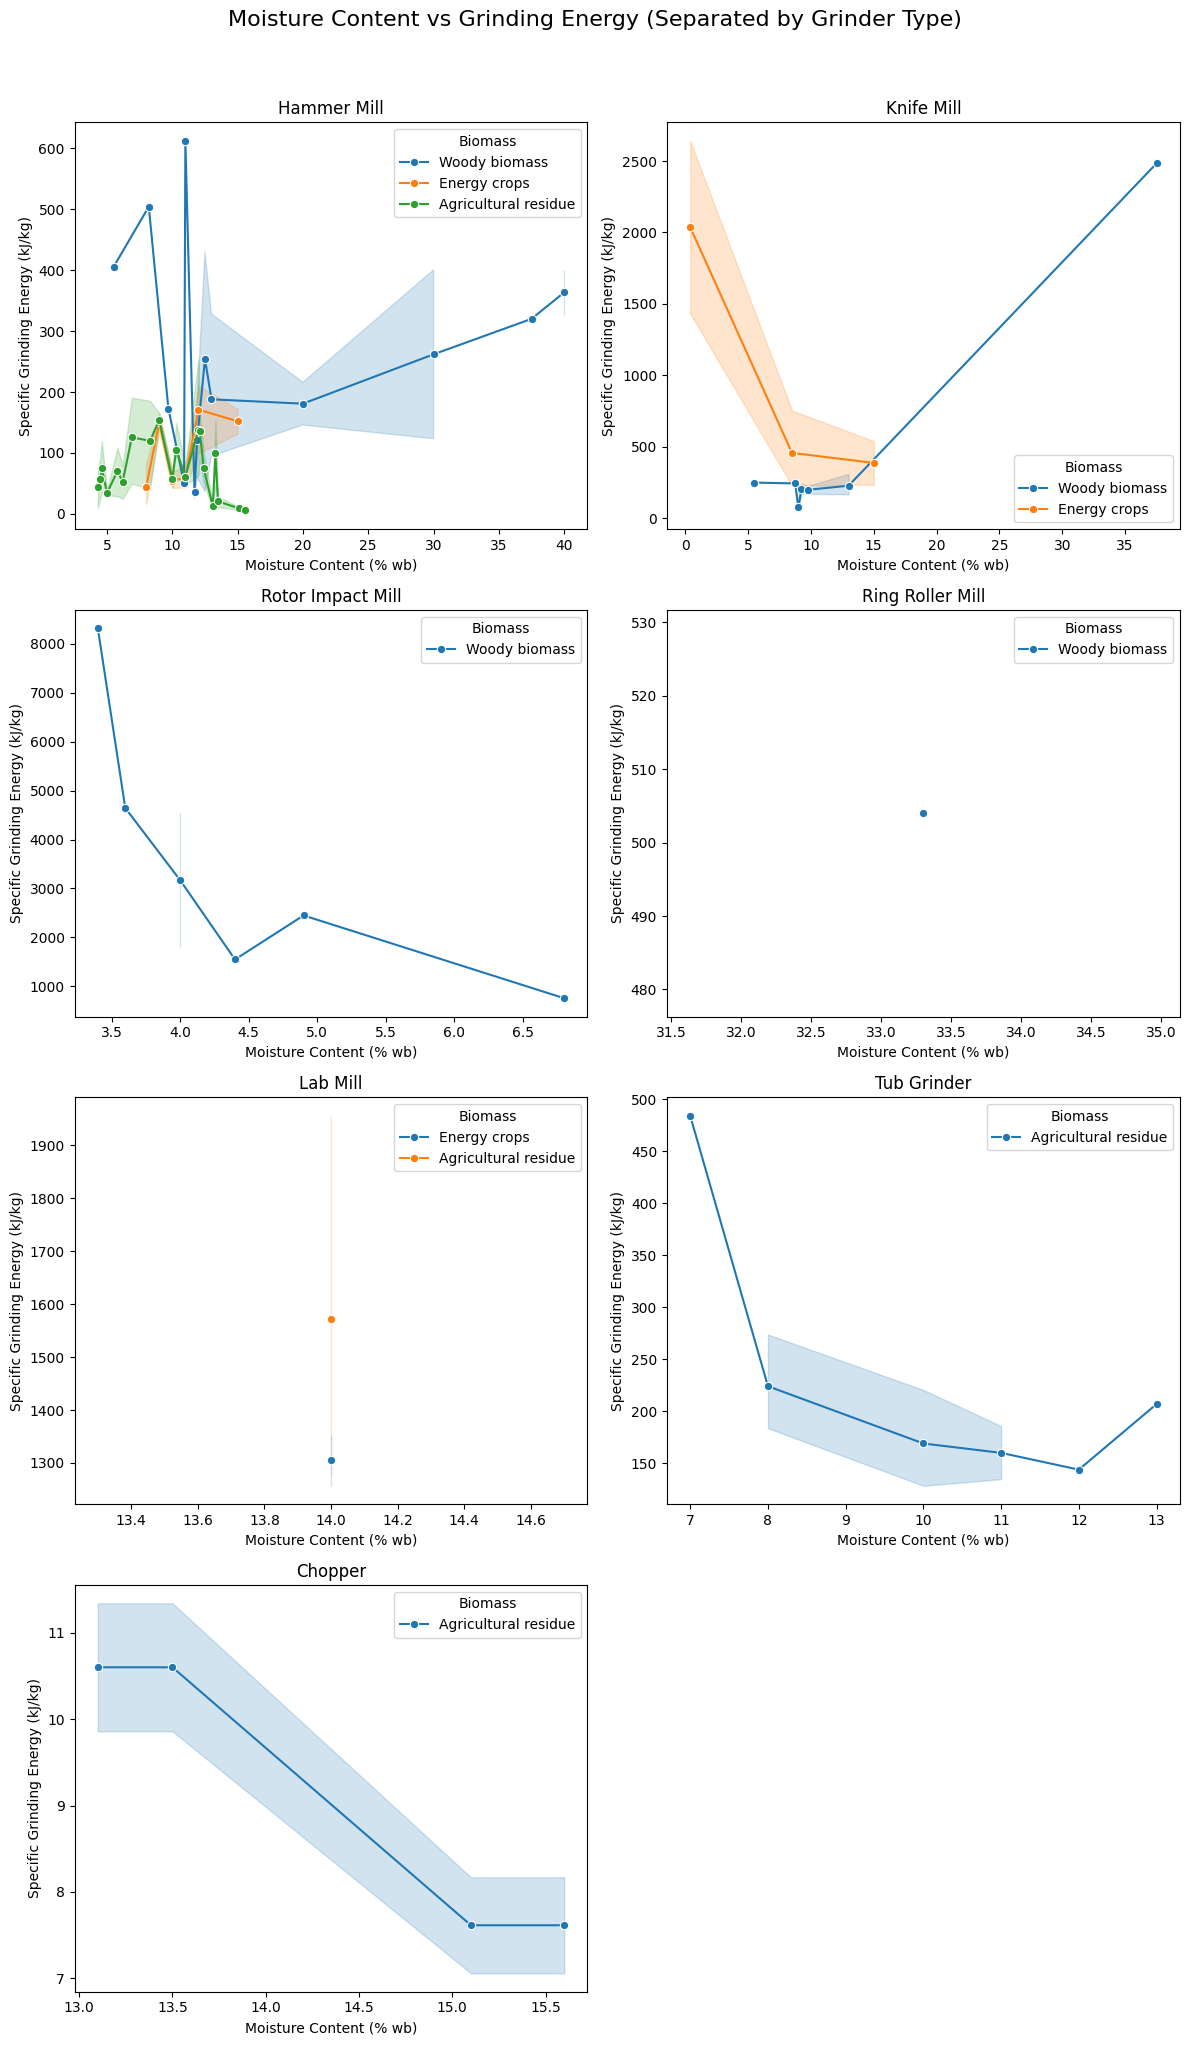

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Drop rows where data is missing
plot_df = df.dropna(subset=["Moisture content (% wb)", "Sp. Grinding energy, kJ/kg", "Grinder type"])

# Get unique grinder types
mills = plot_df["Grinder type"].unique()
n_mills = len(mills)

# Decide grid layout (2 columns looks cleaner for multiple graphs)
n_cols = 2
n_rows = math.ceil(n_mills / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), sharey=False) # here is the change of true to false

# Flatten axes for easy iteration
axes = axes.flatten()

for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.lineplot(
        data=sub_df,
        x="Moisture content (% wb)",
        y="Sp. Grinding energy, kJ/kg",
        hue="Biomass",
        marker="o",
        ax=ax
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Moisture Content (% wb)")
    ax.set_ylabel("Specific Grinding Energy (kJ/kg)")

# Remove any empty axes (if number of mills is odd)
for ax in axes[len(mills):]:
    fig.delaxes(ax)

plt.suptitle("Moisture Content vs Grinding Energy (Separated by Grinder Type)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


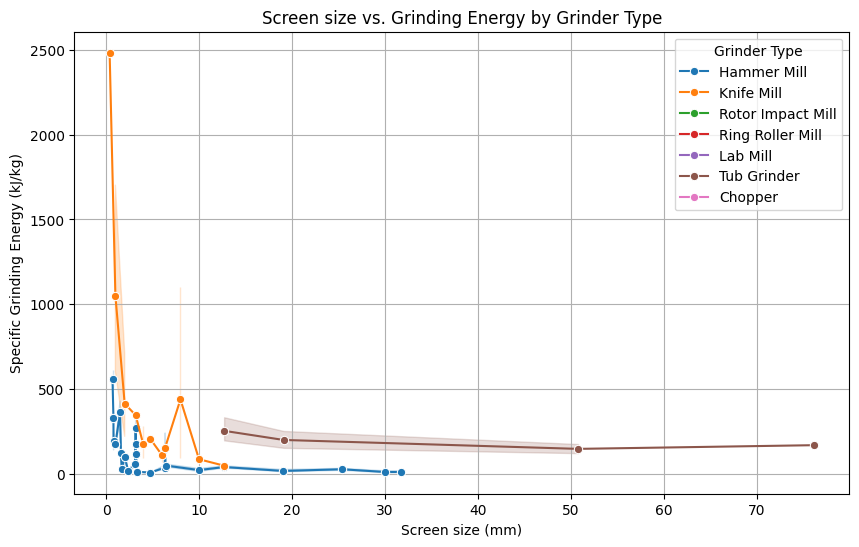

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe

plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="Screen size, mm",
    y="Sp. Grinding energy, kJ/kg",
    hue="Grinder type",
    marker="o"
)

plt.xlabel("Screen size (mm)")
plt.ylabel("Specific Grinding Energy (kJ/kg)")
plt.title("Screen size vs. Grinding Energy by Grinder Type")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


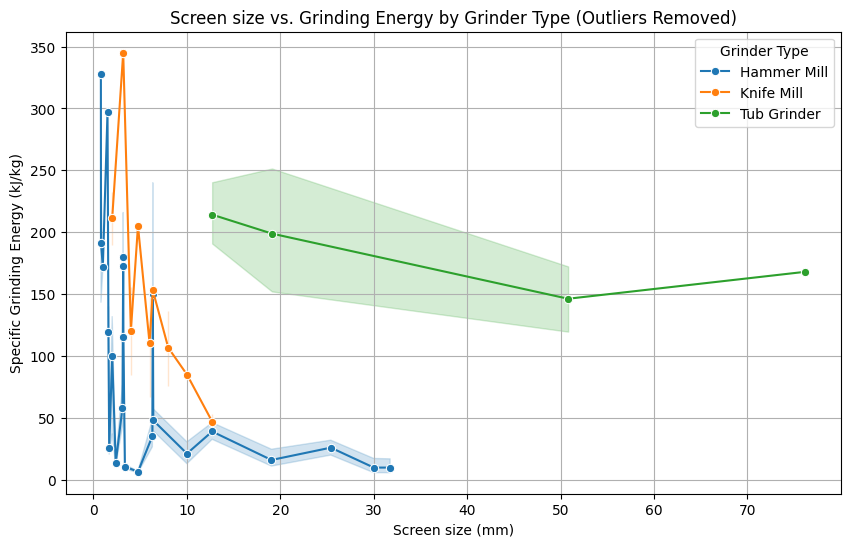

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Remove rows with missing values in the required columns
plot_df = df.dropna(subset=["Screen size, mm", "Sp. Grinding energy, kJ/kg", "Grinder type"])

# Remove outliers based on Grinding Energy
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")

# --- Plot ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=plot_df,
    x="Screen size, mm",
    y="Sp. Grinding energy, kJ/kg",
    hue="Grinder type",
    marker="o"
)

plt.xlabel("Screen size (mm)")
plt.ylabel("Specific Grinding Energy (kJ/kg)")
plt.title("Screen size vs. Grinding Energy by Grinder Type (Outliers Removed)")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


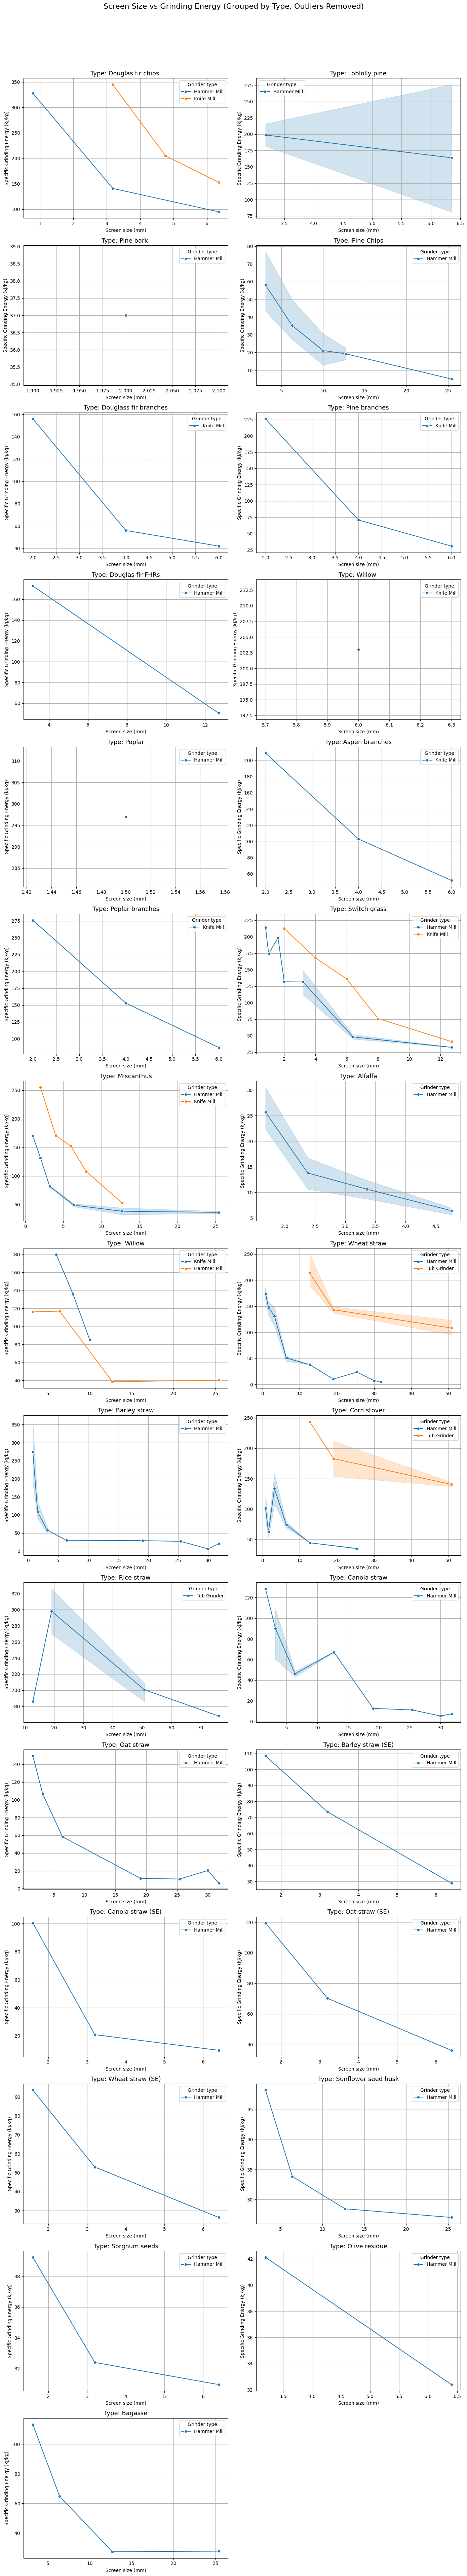

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Clean dataframe
plot_df = df.dropna(subset=["Screen size, mm", "Sp. Grinding energy, kJ/kg", "Grinder type", "Type"])
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")

# Get unique "Type" categories
types = plot_df["Type"].unique()
n_types = len(types)

# Grid layout
n_cols = 2
n_rows = math.ceil(n_types / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows), sharey=False)
axes = axes.flatten()

# Plot each Type separately
for ax, t in zip(axes, types):
    sub_df = plot_df[plot_df["Type"] == t]
    sns.lineplot(
        data=sub_df,
        x="Screen size, mm",
        y="Sp. Grinding energy, kJ/kg",
        hue="Grinder type",
        marker="o",
        ax=ax
    )
    ax.set_title(f"Type: {t}", fontsize=13)
    ax.set_xlabel("Screen size (mm)")
    ax.set_ylabel("Specific Grinding Energy (kJ/kg)")
    ax.grid(True)

# Remove any empty axes (if odd number of types)
for ax in axes[n_types:]:
    fig.delaxes(ax)

plt.suptitle("Screen Size vs Grinding Energy (Grouped by Type, Outliers Removed)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


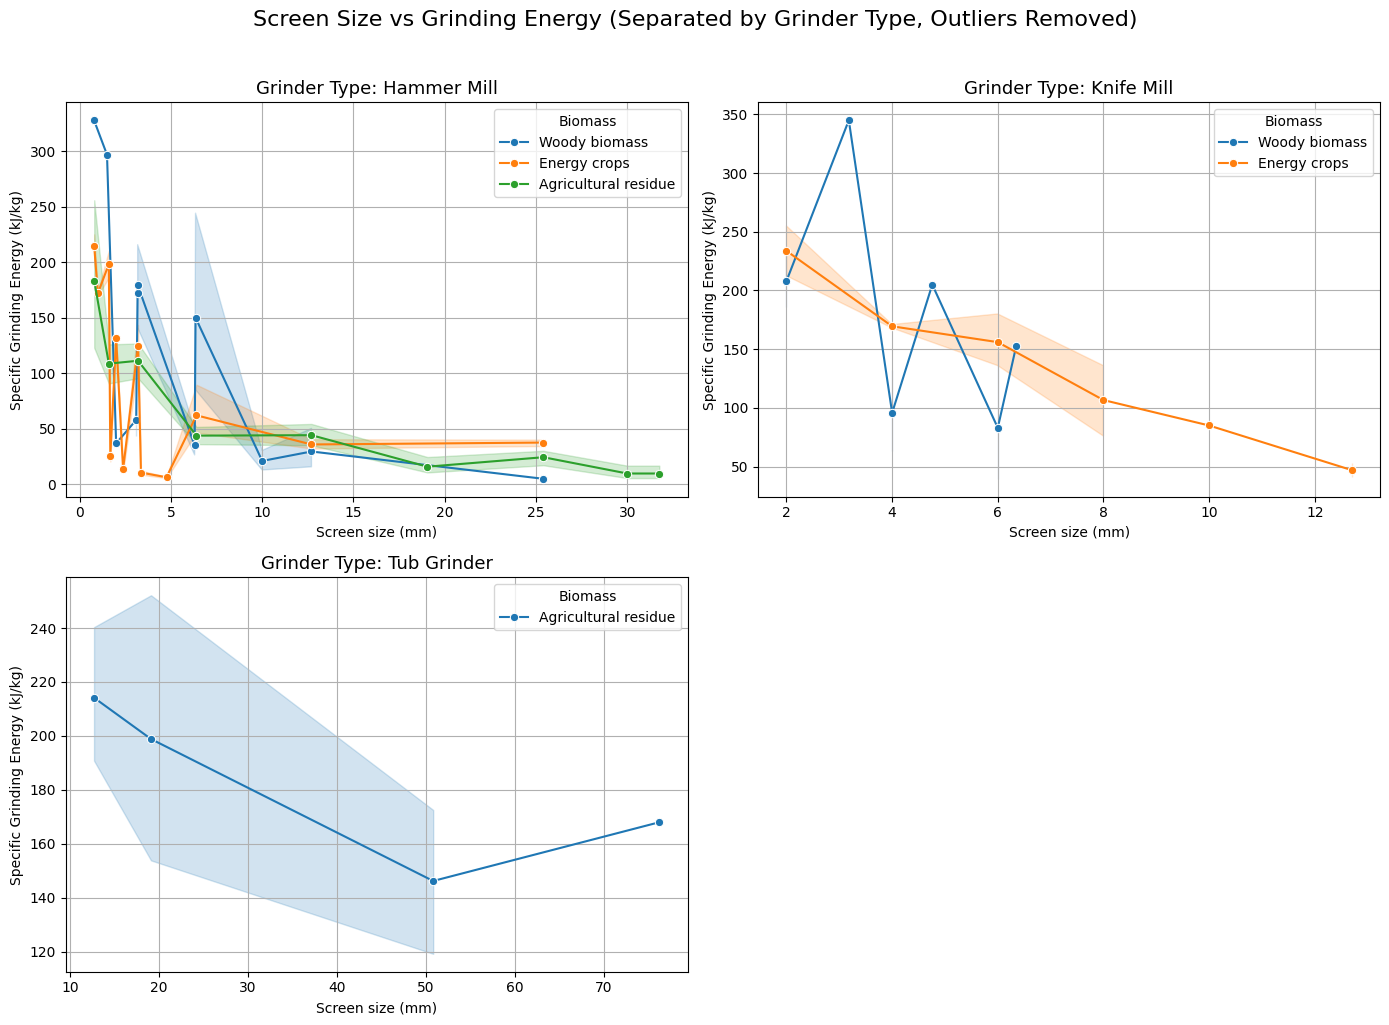

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Clean dataframe
plot_df = df.dropna(subset=["Screen size, mm", "Sp. Grinding energy, kJ/kg", "Grinder type", "Biomass"])
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")

# Get unique Grinder types
mills = plot_df["Grinder type"].unique()
n_mills = len(mills)

# Grid layout
n_cols = 2
n_rows = math.ceil(n_mills / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows), sharey=False)
axes = axes.flatten()

# Plot each Grinder type separately
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.lineplot(
        data=sub_df,
        x="Screen size, mm",
        y="Sp. Grinding energy, kJ/kg",
        hue="Biomass",   # <-- Different lines for Biomass
        marker="o",
        ax=ax
    )
    ax.set_title(f"Grinder Type: {mill}", fontsize=13)
    ax.set_xlabel("Screen size (mm)")
    ax.set_ylabel("Specific Grinding Energy (kJ/kg)")
    ax.grid(True)

# Remove any empty axes
for ax in axes[n_mills:]:
    fig.delaxes(ax)

plt.suptitle("Screen Size vs Grinding Energy (Separated by Grinder Type, Outliers Removed)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


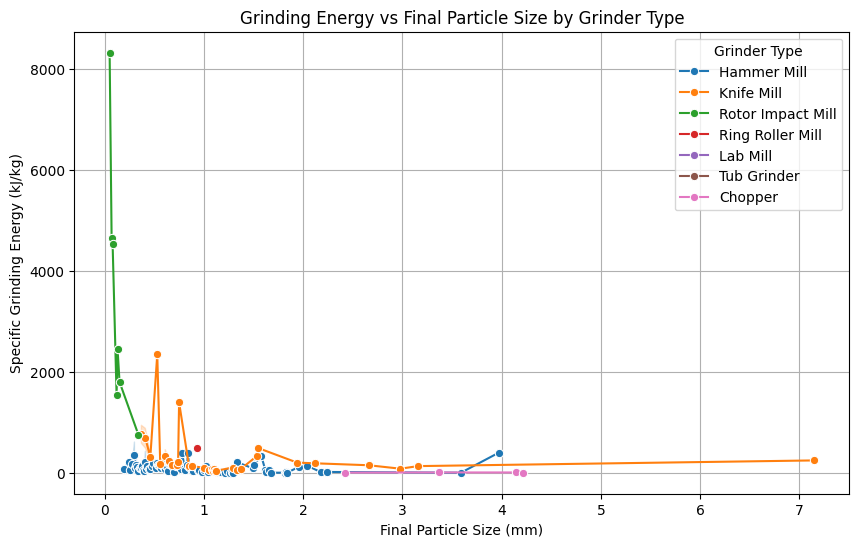

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="Final particle size (mm)",   # replace with exact column name if different
    y="Sp. Grinding energy, kJ/kg",
    hue="Grinder type",
    marker="o"
)

plt.xlabel("Final Particle Size (mm)")
plt.ylabel("Specific Grinding Energy (kJ/kg)")
plt.title("Grinding Energy vs Final Particle Size by Grinder Type")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


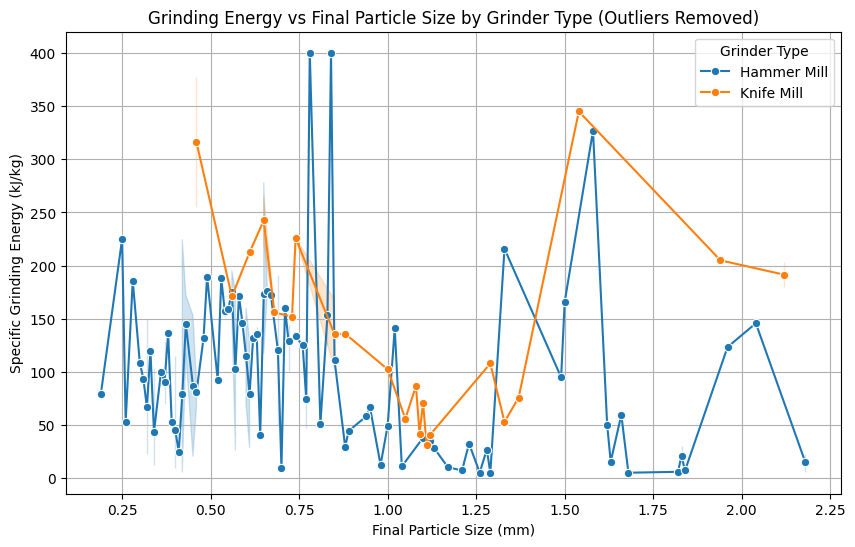

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Drop missing values in relevant columns
plot_df = df.dropna(subset=["Final particle size (mm)", "Sp. Grinding energy, kJ/kg", "Grinder type"])

# Remove outliers in both numeric columns
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Plot ---
plt.figure(figsize=(10,6))

sns.lineplot(
    data=plot_df,
    x="Final particle size (mm)",
    y="Sp. Grinding energy, kJ/kg",
    hue="Grinder type",
    marker="o"
)

plt.xlabel("Final Particle Size (mm)")
plt.ylabel("Specific Grinding Energy (kJ/kg)")
plt.title("Grinding Energy vs Final Particle Size by Grinder Type (Outliers Removed)")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


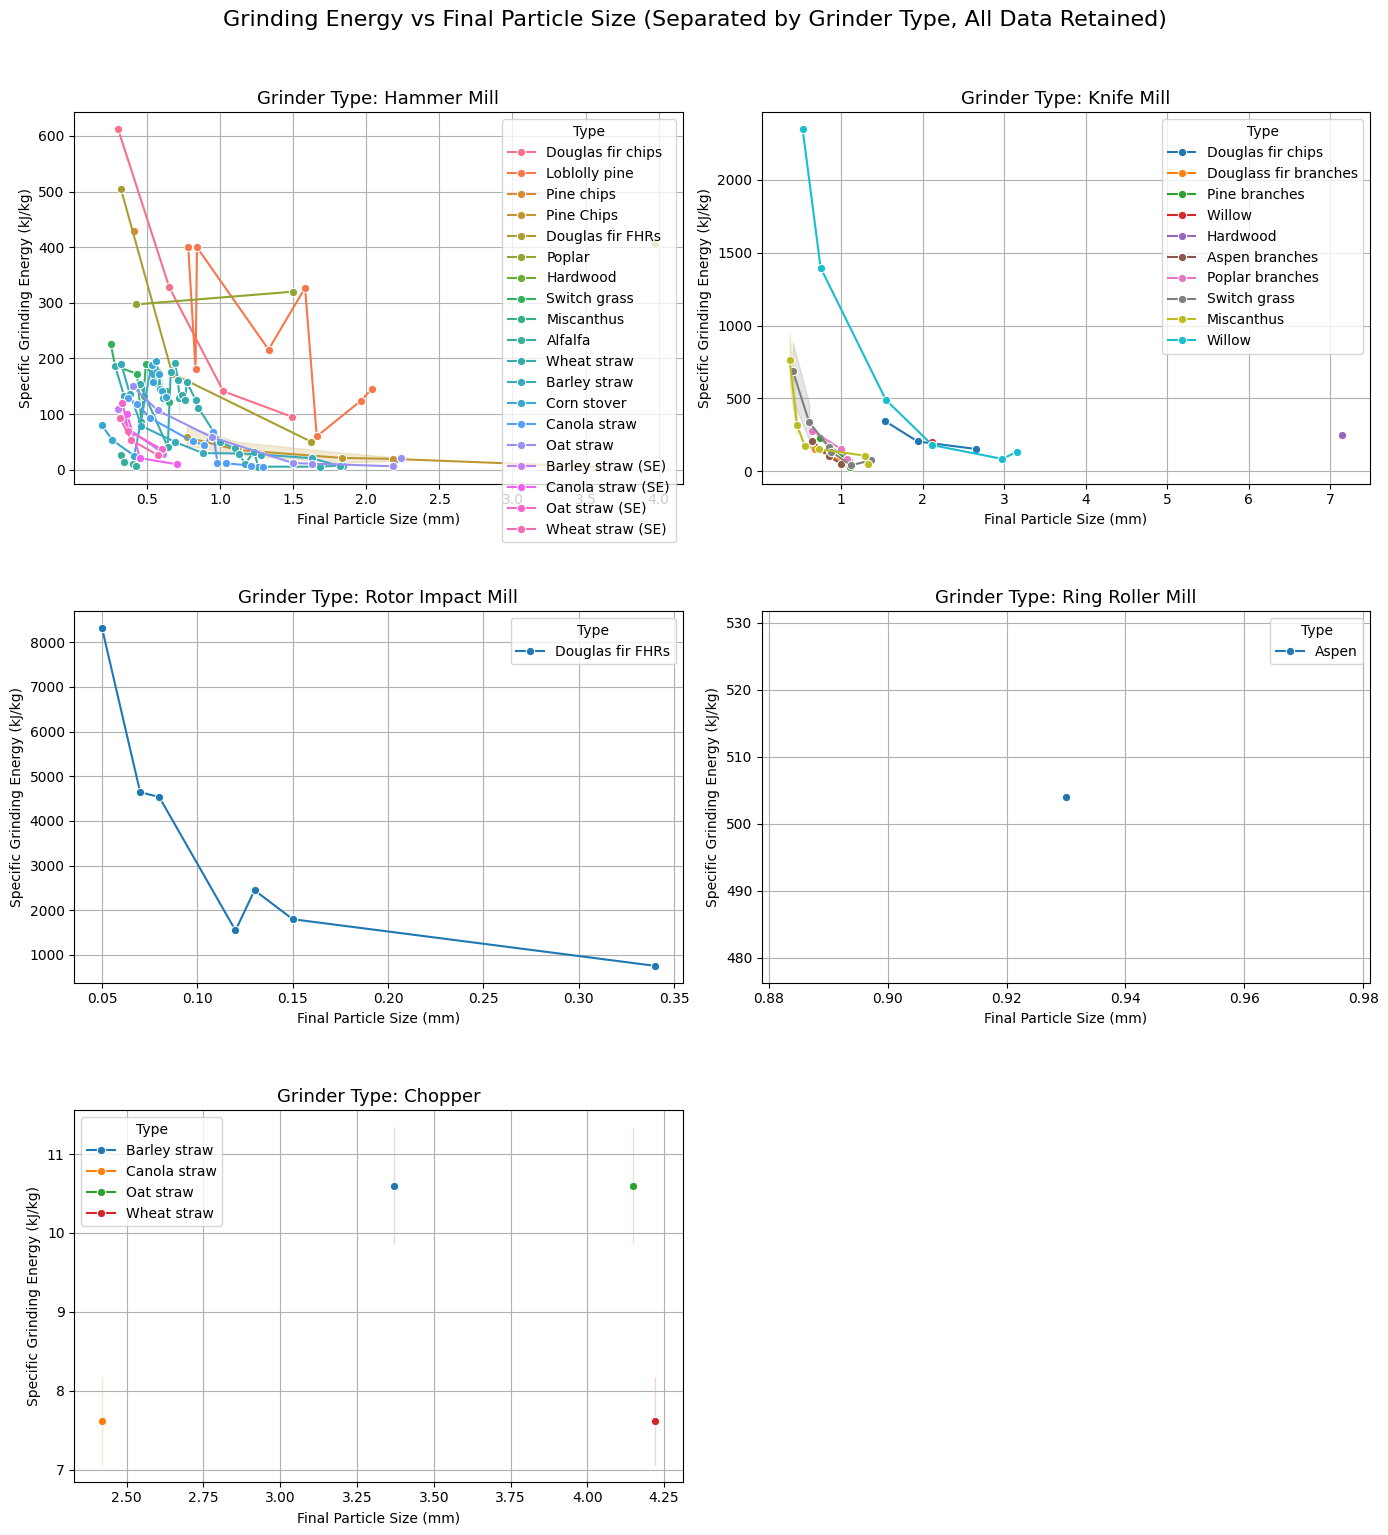

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Drop missing values in relevant columns
plot_df = df.dropna(subset=["Final particle size (mm)", 
                            "Sp. Grinding energy, kJ/kg", 
                            "Grinder type", 
                            "Type"])

# Unique grinder types
mills = plot_df["Grinder type"].unique()
n_mills = len(mills)

# Subplot grid
n_cols = 2
n_rows = math.ceil(n_mills / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows), sharey=False)
axes = axes.flatten()

# Plot per Grinder type
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.lineplot(
        data=sub_df,
        x="Final particle size (mm)",
        y="Sp. Grinding energy, kJ/kg",
        hue="Type",      # <-- different lines for Type
        marker="o",
        ax=ax
    )
    ax.set_title(f"Grinder Type: {mill}", fontsize=13)
    ax.set_xlabel("Final Particle Size (mm)")
    ax.set_ylabel("Specific Grinding Energy (kJ/kg)")
    ax.grid(True)

# Remove empty axes (if odd number of mills)
for ax in axes[n_mills:]:
    fig.delaxes(ax)

plt.suptitle("Grinding Energy vs Final Particle Size (Separated by Grinder Type, All Data Retained)", 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


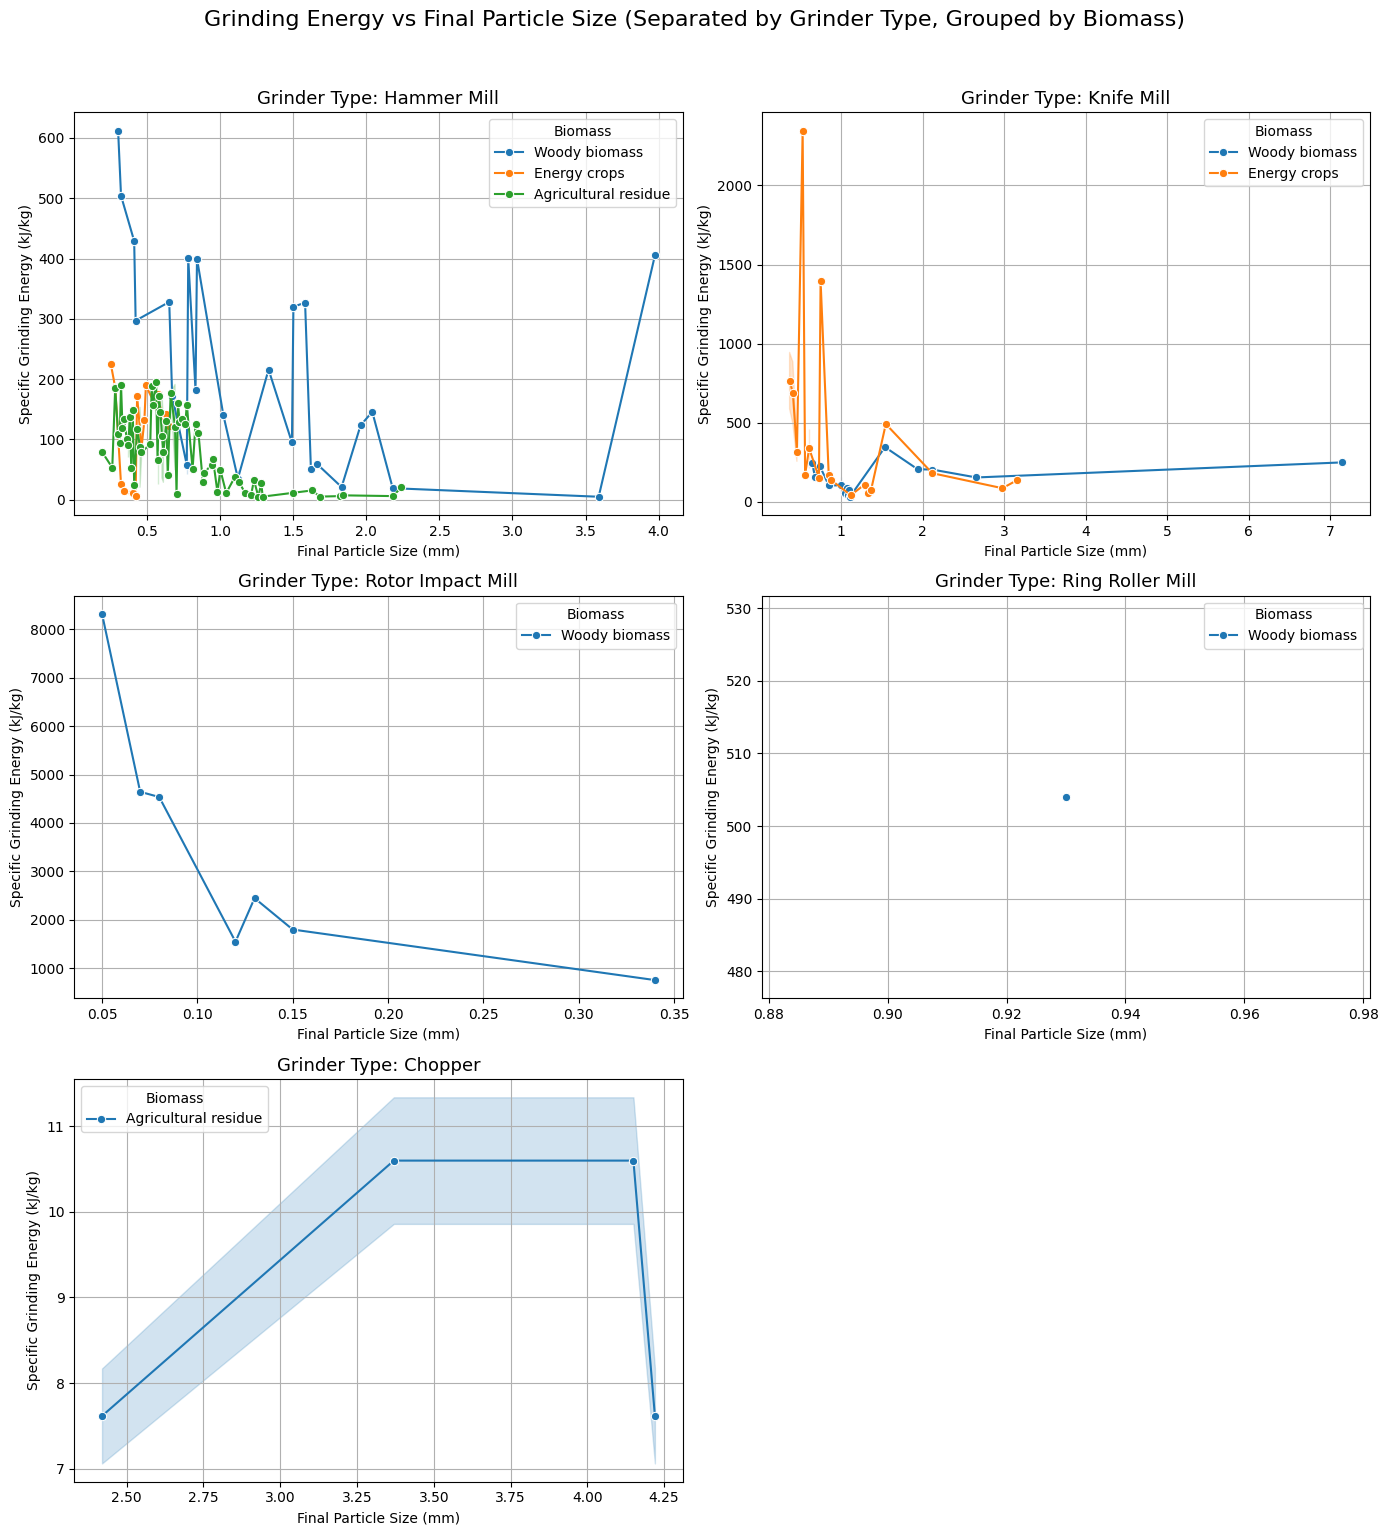

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Drop missing values in relevant columns
plot_df = df.dropna(subset=["Final particle size (mm)", 
                            "Sp. Grinding energy, kJ/kg", 
                            "Grinder type", 
                            "Biomass"])

# Unique grinder types
mills = plot_df["Grinder type"].unique()
n_mills = len(mills)

# Subplot grid
n_cols = 2
n_rows = math.ceil(n_mills / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows), sharey=False)
axes = axes.flatten()

# Plot per Grinder type
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.lineplot(
        data=sub_df,
        x="Final particle size (mm)",
        y="Sp. Grinding energy, kJ/kg",
        hue="Biomass",   # <-- Different lines by Biomass
        marker="o",
        ax=ax
    )
    ax.set_title(f"Grinder Type: {mill}", fontsize=13)
    ax.set_xlabel("Final Particle Size (mm)")
    ax.set_ylabel("Specific Grinding Energy (kJ/kg)")
    ax.grid(True)

# Remove empty axes (if odd number of mills)
for ax in axes[n_mills:]:
    fig.delaxes(ax)

plt.suptitle("Grinding Energy vs Final Particle Size (Separated by Grinder Type, Grouped by Biomass)", 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


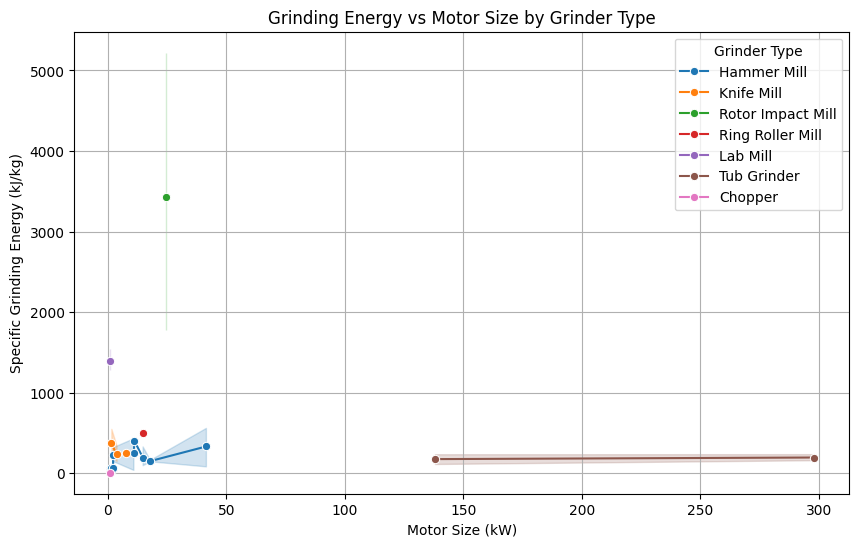

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="Motor size, kW", 
    y="Sp. Grinding energy, kJ/kg",
    hue="Grinder type",
    marker="o"
)

plt.xlabel("Motor Size (kW)")
plt.ylabel("Specific Grinding Energy (kJ/kg)")
plt.title("Grinding Energy vs Motor Size by Grinder Type")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()



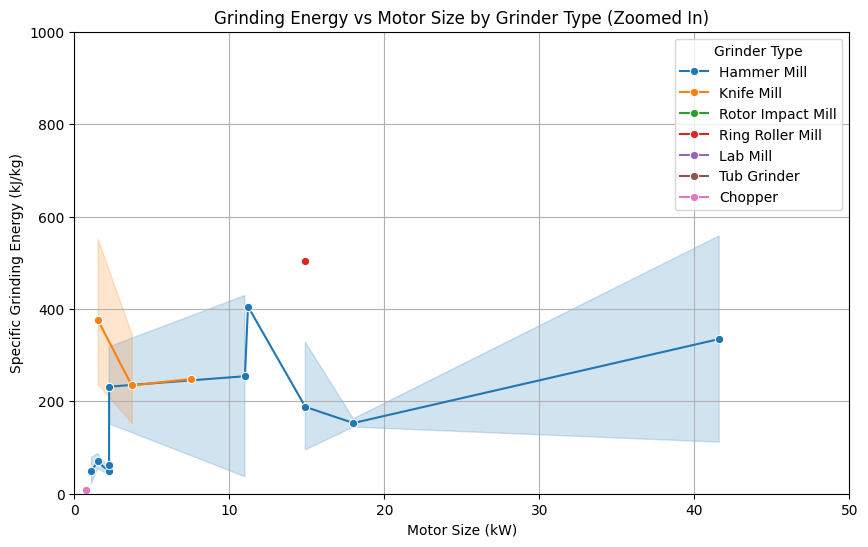

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


plot_df = df.dropna(subset=["Motor size, kW", "Sp. Grinding energy, kJ/kg", "Grinder type"])


plt.figure(figsize=(10,6))

sns.lineplot(
    data=plot_df,
    x="Motor size, kW", 
    y="Sp. Grinding energy, kJ/kg",
    hue="Grinder type",
    marker="o"
)

plt.xlabel("Motor Size (kW)")
plt.ylabel("Specific Grinding Energy (kJ/kg)")
plt.title("Grinding Energy vs Motor Size by Grinder Type (Zoomed In)")

# --- Zoom in to dense region ---
plt.xlim(0, 50)
plt.ylim(0, 1000)

plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


This time we're doing it again but properly and planned


1) Final Particle Size vs Screen Size


In [50]:
df.groupby("Grinder type")[["Screen size, mm", "Final particle size (mm)"]].count()

Screen size, mm  Final particle size (mm)
Grinder type                                                      
CHOPPER                                0                         8
HAMMER MILL                          195                       137
KNIFE MILL                            62                        60
LAB MILL                               0                         0
MEDALLION (TUB) GRINDER                4                         0
RING ROLLER MILL                       0                         1
ROTOR IMPACT MILL                      0                         7
WHO (TUB) GRINDER                     20                         0

/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/3193716502.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/3193716502.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


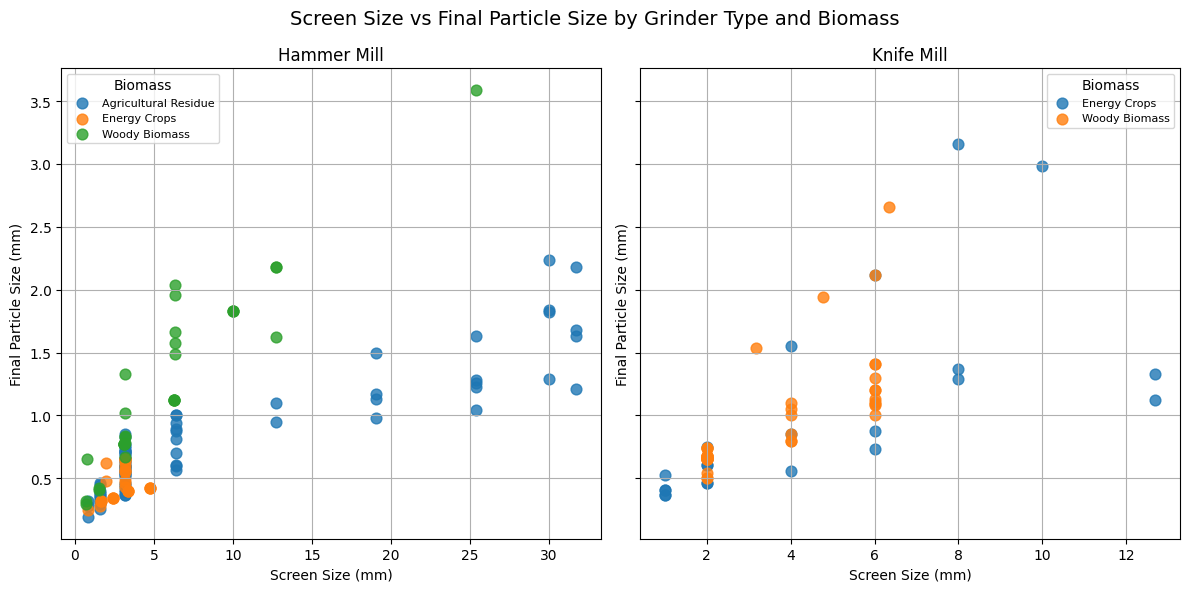

In [49]:
import matplotlib.pyplot as plt

# Drop missing values
plot_df = df.dropna(subset=["Screen size, mm", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize case (to avoid duplicates like "Hammer Mill" vs "HAMMER MILL")
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# Get unique grinder types
mills_to_plot = plot_df["Grinder type"].unique()
num_mills = len(mills_to_plot)

# Create subplots
fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]  # ensure iterable for single grinder type

# Plot for each grinder type
for ax, mill in zip(axes, mills_to_plot):
    sub_df_mill = plot_df[plot_df["Grinder type"] == mill]
    
    for biomass, sub_df in sub_df_mill.groupby("Biomass"):
        ax.scatter(
            sub_df["Screen size, mm"], 
            sub_df["Final particle size (mm)"],
            label=biomass,
            alpha=0.8,
            s=60
        )
    
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Screen Size (mm)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)
    ax.legend(title="Biomass", fontsize=8)

# Overall title
plt.suptitle("Screen Size vs Final Particle Size by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


In [52]:
df.groupby("Grinder type")[["Sp. Grinding energy, kJ/kg", "Final particle size (mm)"]].count()

Sp. Grinding energy, kJ/kg  Final particle size (mm)
Grinder type                                                                 
CHOPPER                                           8                         8
HAMMER MILL                                     197                       137
KNIFE MILL                                       52                        60
LAB MILL                                         15                         0
MEDALLION (TUB) GRINDER                           4                         0
RING ROLLER MILL                                  1                         1
ROTOR IMPACT MILL                                 7                         7
WHO (TUB) GRINDER                                20                         0

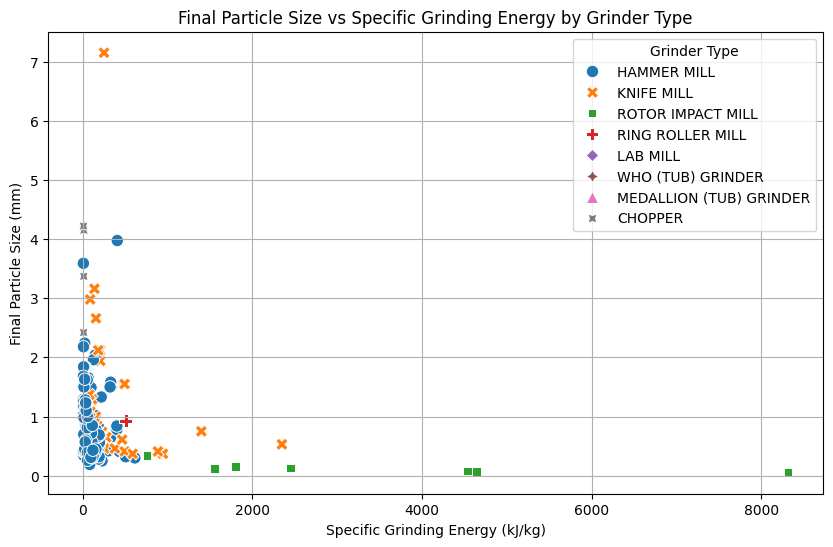

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x="Sp. Grinding energy, kJ/kg",
    y="Final particle size (mm)",
    hue="Grinder type",
    style="Grinder type",
    s=80
)


plt.xlabel("Specific Grinding Energy (kJ/kg)")
plt.ylabel("Final Particle Size (mm)")
plt.title("Final Particle Size vs Specific Grinding Energy by Grinder Type")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


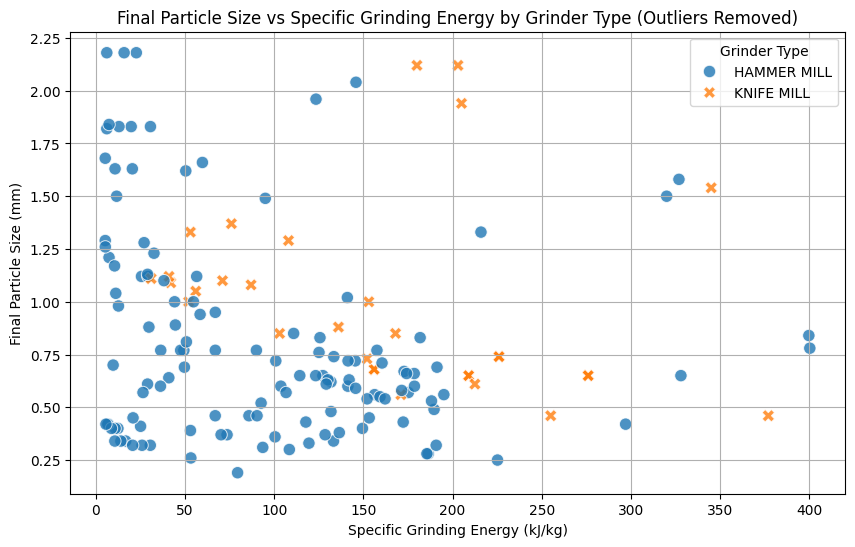

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Drop missing values in relevant columns
plot_df = df.dropna(subset=["Final particle size (mm)", "Sp. Grinding energy, kJ/kg", "Grinder type"])

# Remove outliers in both numeric columns
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Scatter Plot ---
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=plot_df,
    x="Sp. Grinding energy, kJ/kg",     # now on X-axis
    y="Final particle size (mm)",       # now on Y-axis
    hue="Grinder type",
    style="Grinder type",
    s=80,
    alpha=0.8
)

plt.xlabel("Specific Grinding Energy (kJ/kg)")
plt.ylabel("Final Particle Size (mm)")
plt.title("Final Particle Size vs Specific Grinding Energy by Grinder Type (Outliers Removed)")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1874332113.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1874332113.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


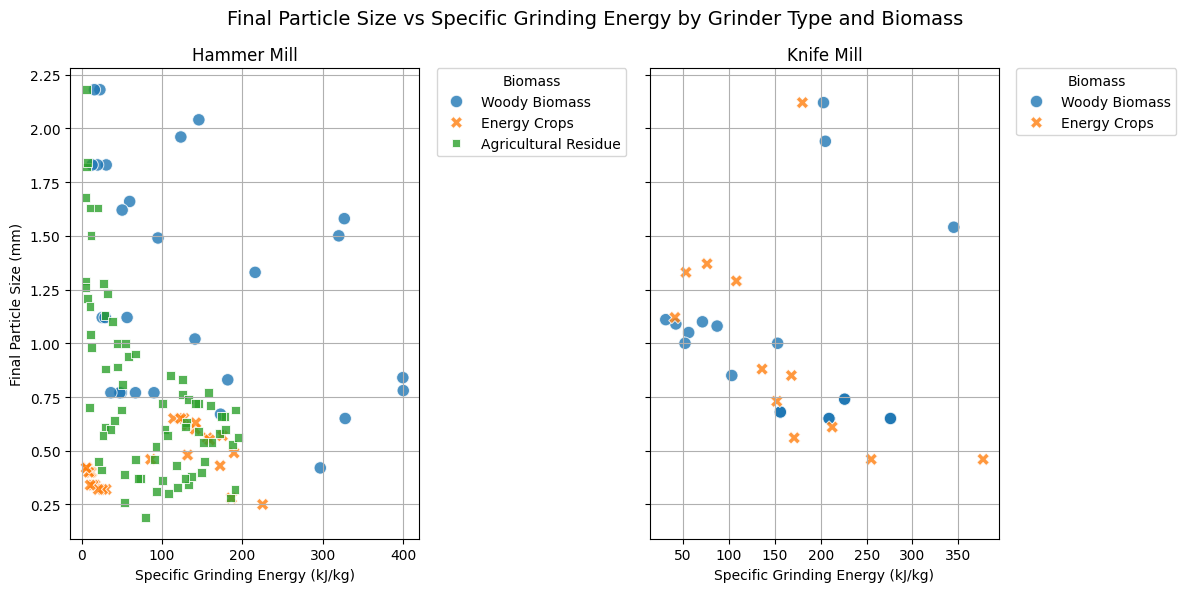

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# --- Data cleaning ---
plot_df = df.dropna(subset=["Final particle size (mm)", "Sp. Grinding energy, kJ/kg", "Grinder type", "Biomass"])

# Standardize case
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# Remove outliers
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)

# Ensure axes is iterable
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Sp. Grinding energy, kJ/kg",
        y="Final particle size (mm)",
        hue="Biomass",          # differentiate by biomass
        style="Biomass",        # different markers
        s=80,
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Specific Grinding Energy (kJ/kg)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)
    ax.legend(title="Biomass", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.suptitle("Final Particle Size vs Specific Grinding Energy by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2535395074.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2535395074.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


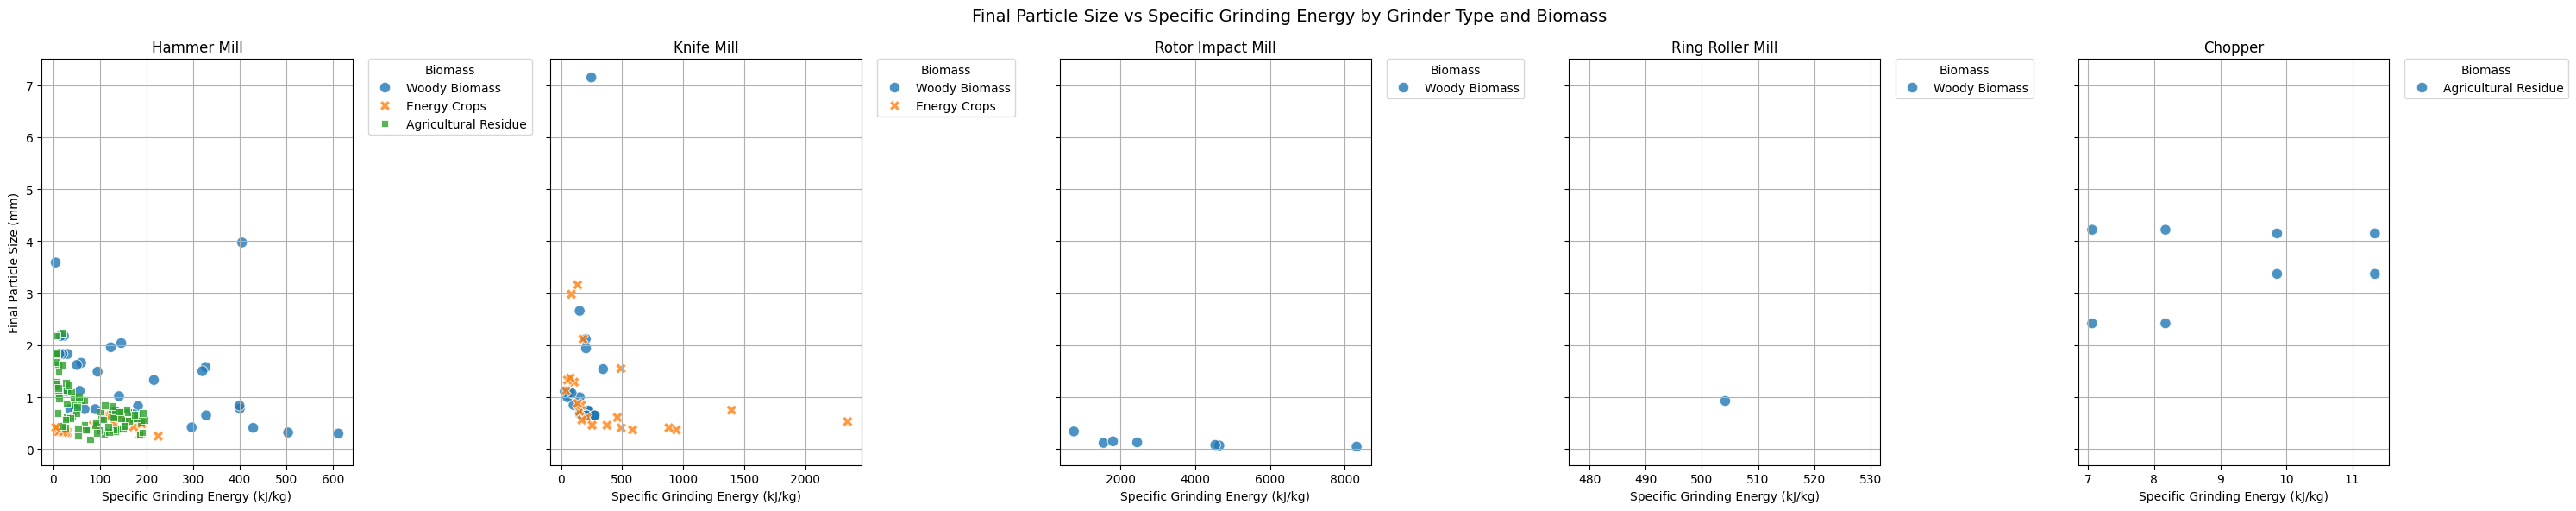

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Final particle size (mm)", "Sp. Grinding energy, kJ/kg", "Grinder type", "Biomass"])

# Standardize case
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)

# Ensure axes is iterable
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Sp. Grinding energy, kJ/kg",
        y="Final particle size (mm)",
        hue="Biomass",          # differentiate by biomass
        style="Biomass",        # different markers
        s=80,
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Specific Grinding Energy (kJ/kg)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)
    ax.legend(title="Biomass", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.suptitle("Final Particle Size vs Specific Grinding Energy by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


In [53]:
df.groupby("Grinder type")[["Moisture content (% wb)", "Final particle size (mm)"]].count()

Moisture content (% wb)  Final particle size (mm)
Grinder type                                                              
CHOPPER                                        8                         8
HAMMER MILL                                  197                       137
KNIFE MILL                                    63                        60
LAB MILL                                      15                         0
MEDALLION (TUB) GRINDER                        4                         0
RING ROLLER MILL                               1                         1
ROTOR IMPACT MILL                              7                         7
WHO (TUB) GRINDER                             20                         0

/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/3069871566.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/3069871566.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


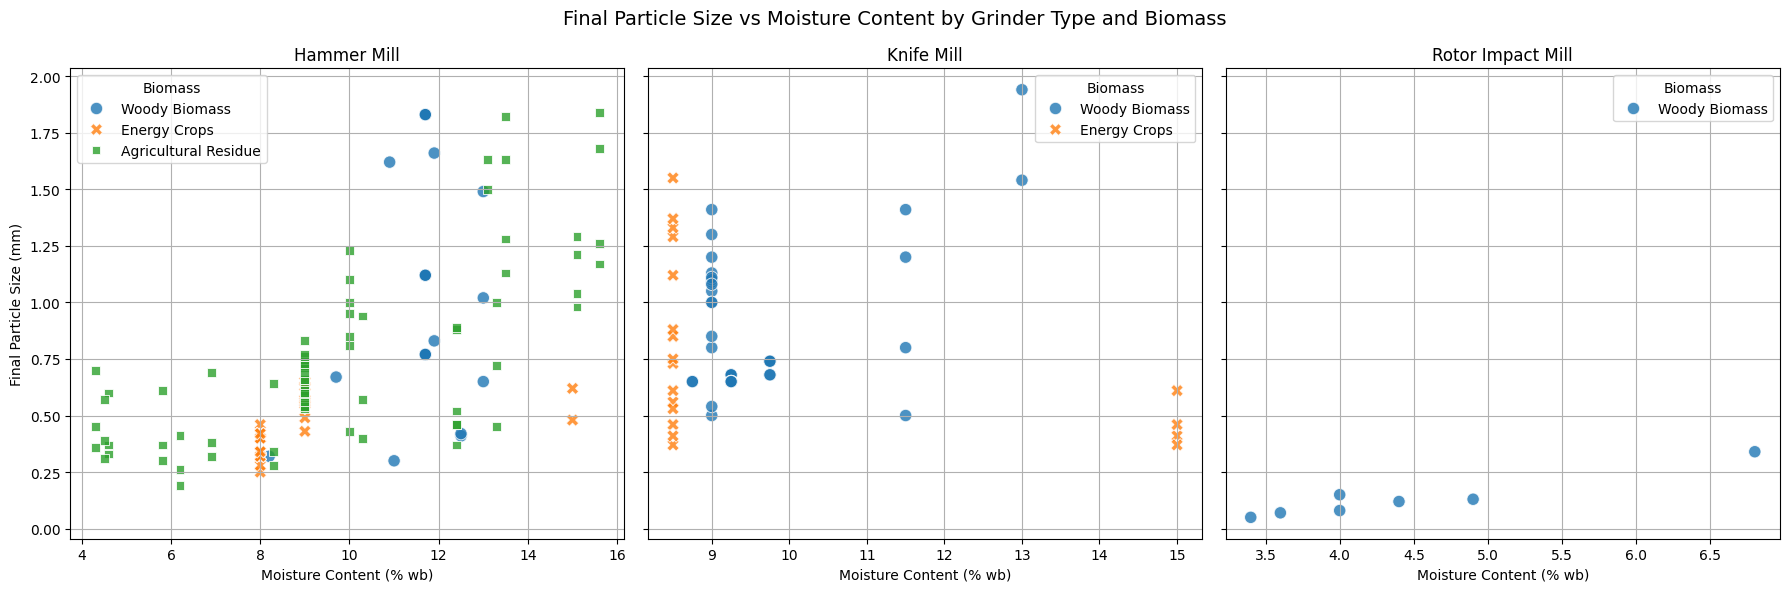

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# --- Data cleaning ---
plot_df = df.dropna(subset=["Final particle size (mm)", "Moisture content (% wb)", "Grinder type", "Biomass"])

# Standardize text
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# Remove outliers
plot_df = remove_outliers_iqr(plot_df, "Moisture content (% wb)")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type with legends ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Moisture content (% wb)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True  # keep legend for each subplot
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Moisture Content (% wb)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Moisture Content by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/261913054.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/261913054.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


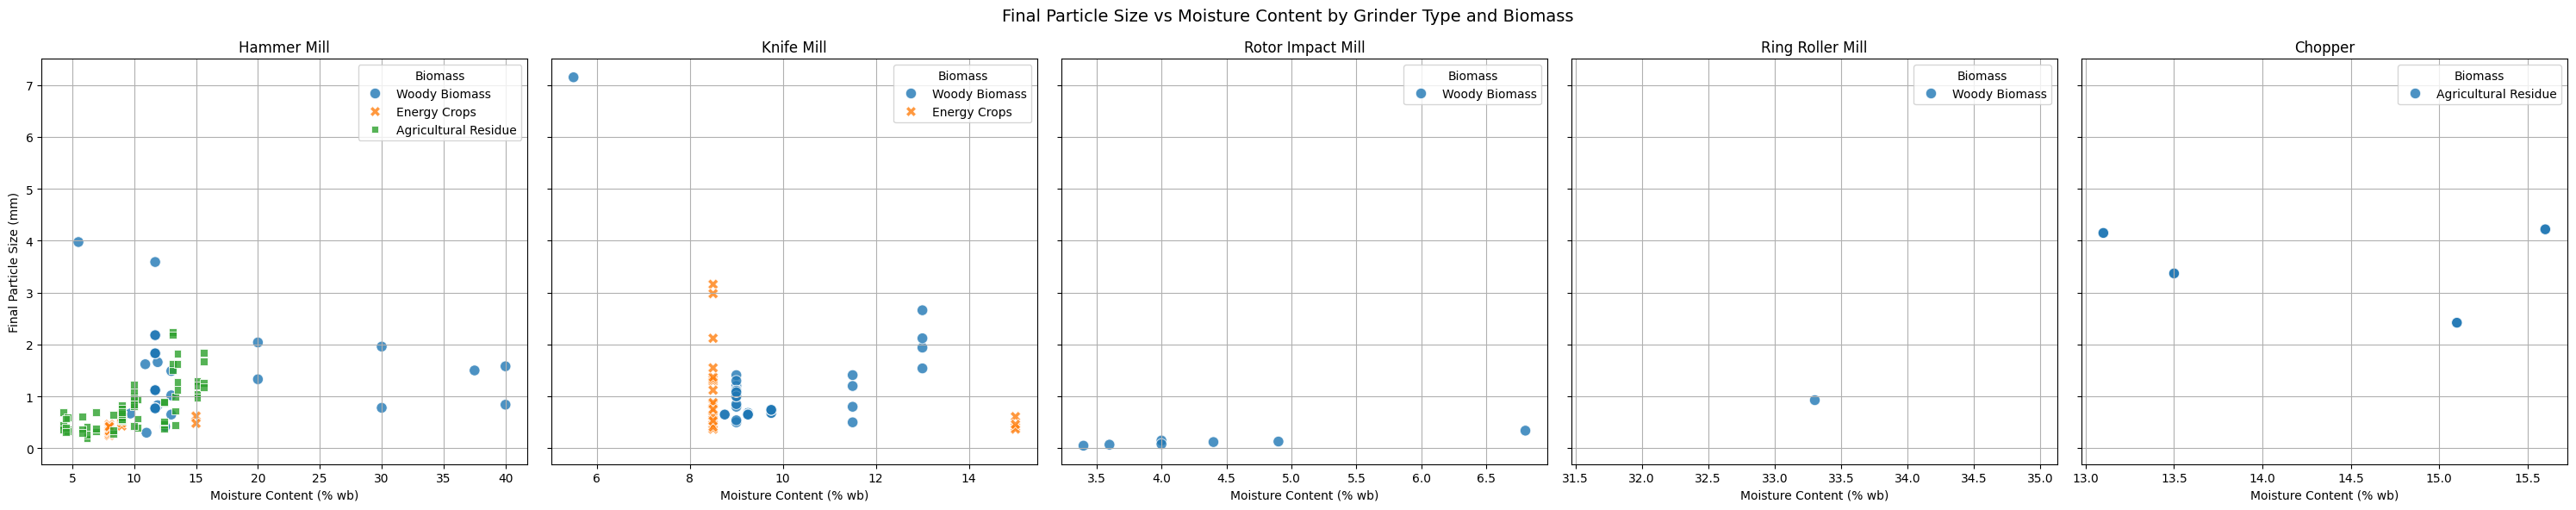

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Final particle size (mm)", "Moisture content (% wb)", "Grinder type", "Biomass"])

# Standardize text
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type with legends ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Moisture content (% wb)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Moisture Content (% wb)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Moisture Content by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


In [54]:
df.groupby("Grinder type")[["Initial avg. particle size, (mm)", "Final particle size (mm)"]].count()

Initial avg. particle size, (mm)  \
Grinder type                                                
CHOPPER                                                 0   
HAMMER MILL                                           129   
KNIFE MILL                                             38   
LAB MILL                                               15   
MEDALLION (TUB) GRINDER                                 0   
RING ROLLER MILL                                        1   
ROTOR IMPACT MILL                                       7   
WHO (TUB) GRINDER                                       0   

                         Final particle size (mm)  
Grinder type                                       
CHOPPER                                         8  
HAMMER MILL                                   137  
KNIFE MILL                                     60  
LAB MILL                                        0  
MEDALLION (TUB) GRINDER                         0  
RING ROLLER MILL                                1  
ROTOR IMPACT MILL                               7  
WHO (TUB) GRINDER                               0

/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2142861864.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2142861864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


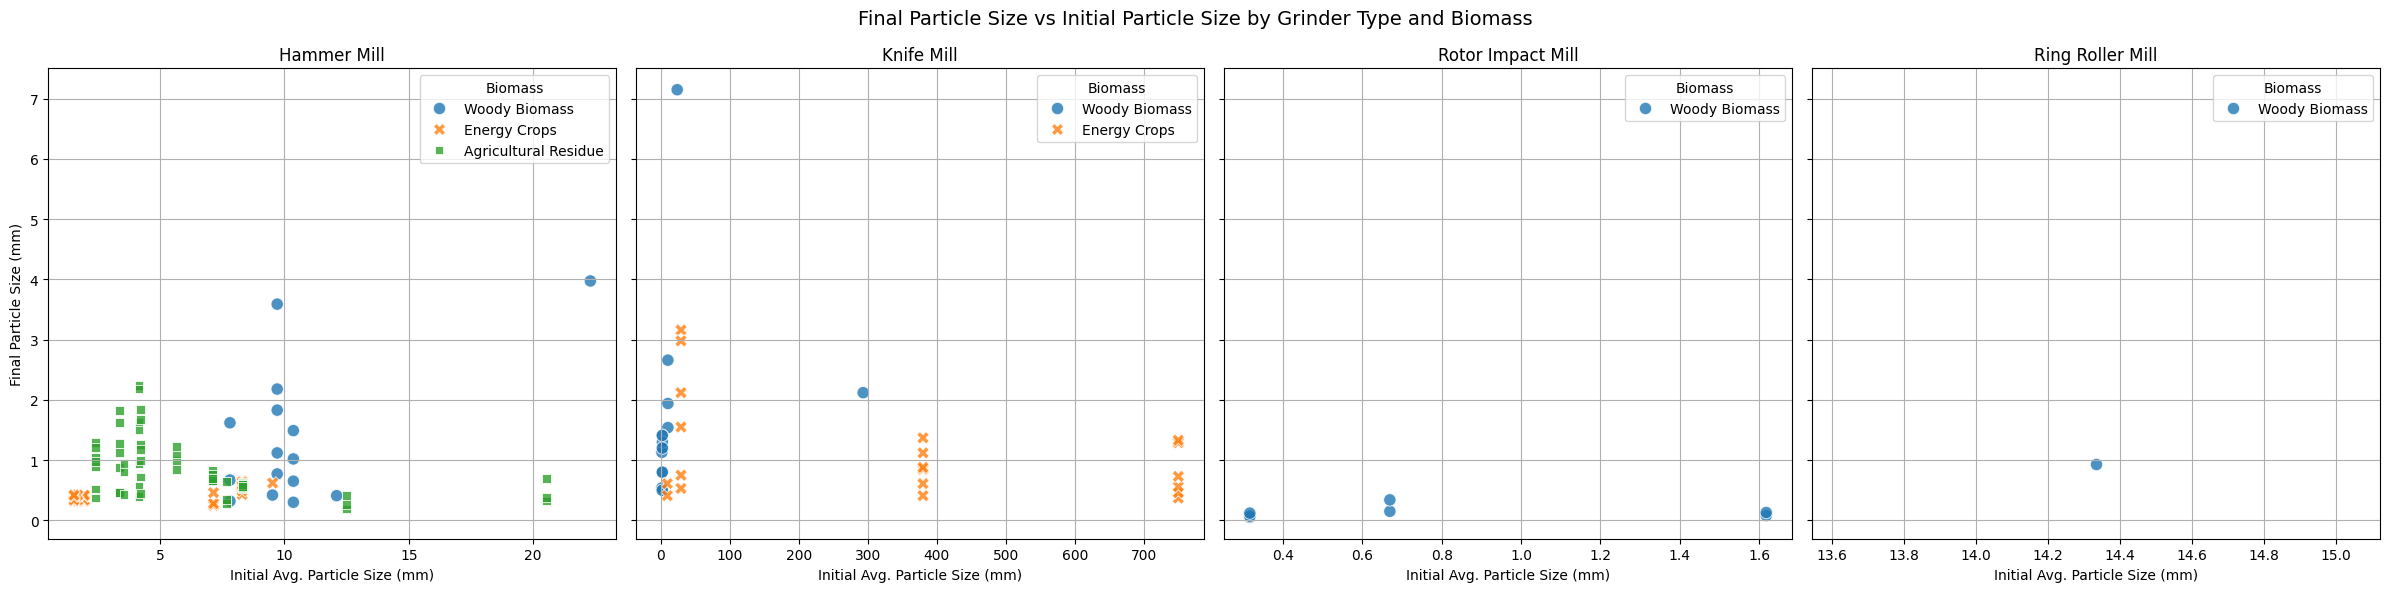

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Initial avg. particle size, (mm)", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type with legends ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Initial avg. particle size, (mm)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Initial Avg. Particle Size (mm)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Initial Particle Size by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


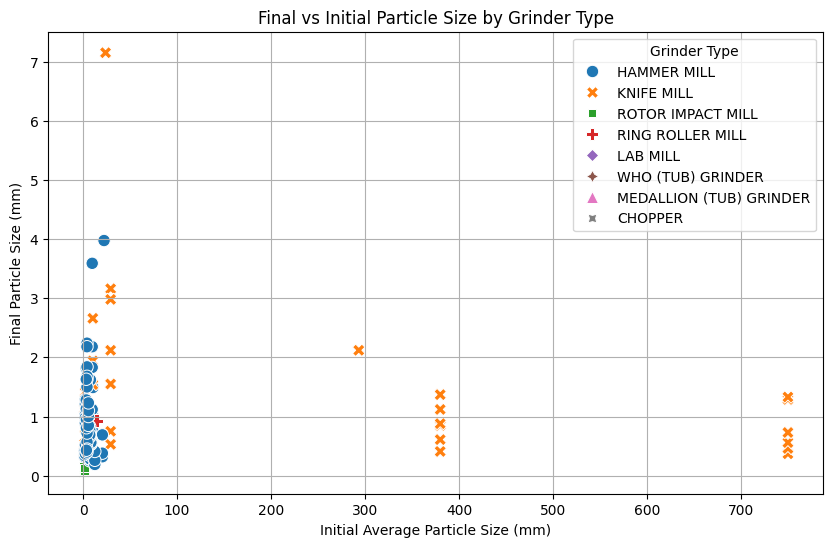

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Initial avg. particle size, (mm)",
    y="Final particle size (mm)",
    hue="Grinder type",
    style="Grinder type",
    s=80
)

plt.xlabel("Initial Average Particle Size (mm)")
plt.ylabel("Final Particle Size (mm)")
plt.title("Final vs Initial Particle Size by Grinder Type")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


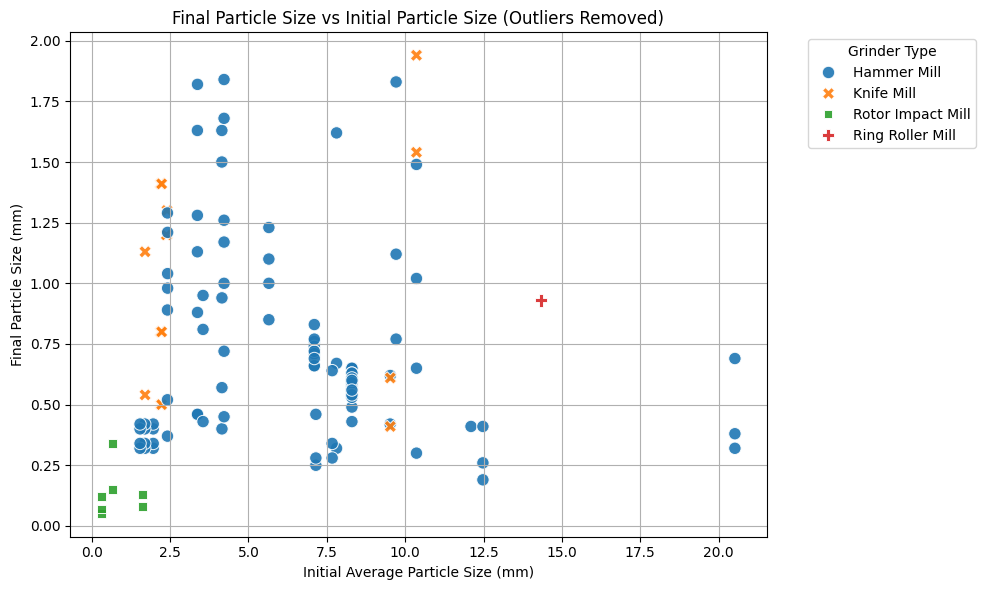

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Function to remove outliers using IQR ---
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        if col in cleaned_df.columns:
            Q1 = cleaned_df[col].quantile(0.25)
            Q3 = cleaned_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    return cleaned_df

# --- Clean and standardize ---
numeric_cols = ["Initial avg. particle size, (mm)", "Final particle size (mm)"]
df_clean = remove_outliers_iqr(df, numeric_cols)

# Standardize Grinder Type labels
df_clean["Grinder type"] = df_clean["Grinder type"].str.strip().str.title()

# --- Plot: Final vs Initial Particle Size ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x="Initial avg. particle size, (mm)",
    y="Final particle size (mm)",
    hue="Grinder type",
    style="Grinder type",
    s=80,
    alpha=0.9
)

plt.xlabel("Initial Average Particle Size (mm)")
plt.ylabel("Final Particle Size (mm)")
plt.title("Final Particle Size vs Initial Particle Size (Outliers Removed)")
plt.legend(title="Grinder Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/641309659.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/641309659.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


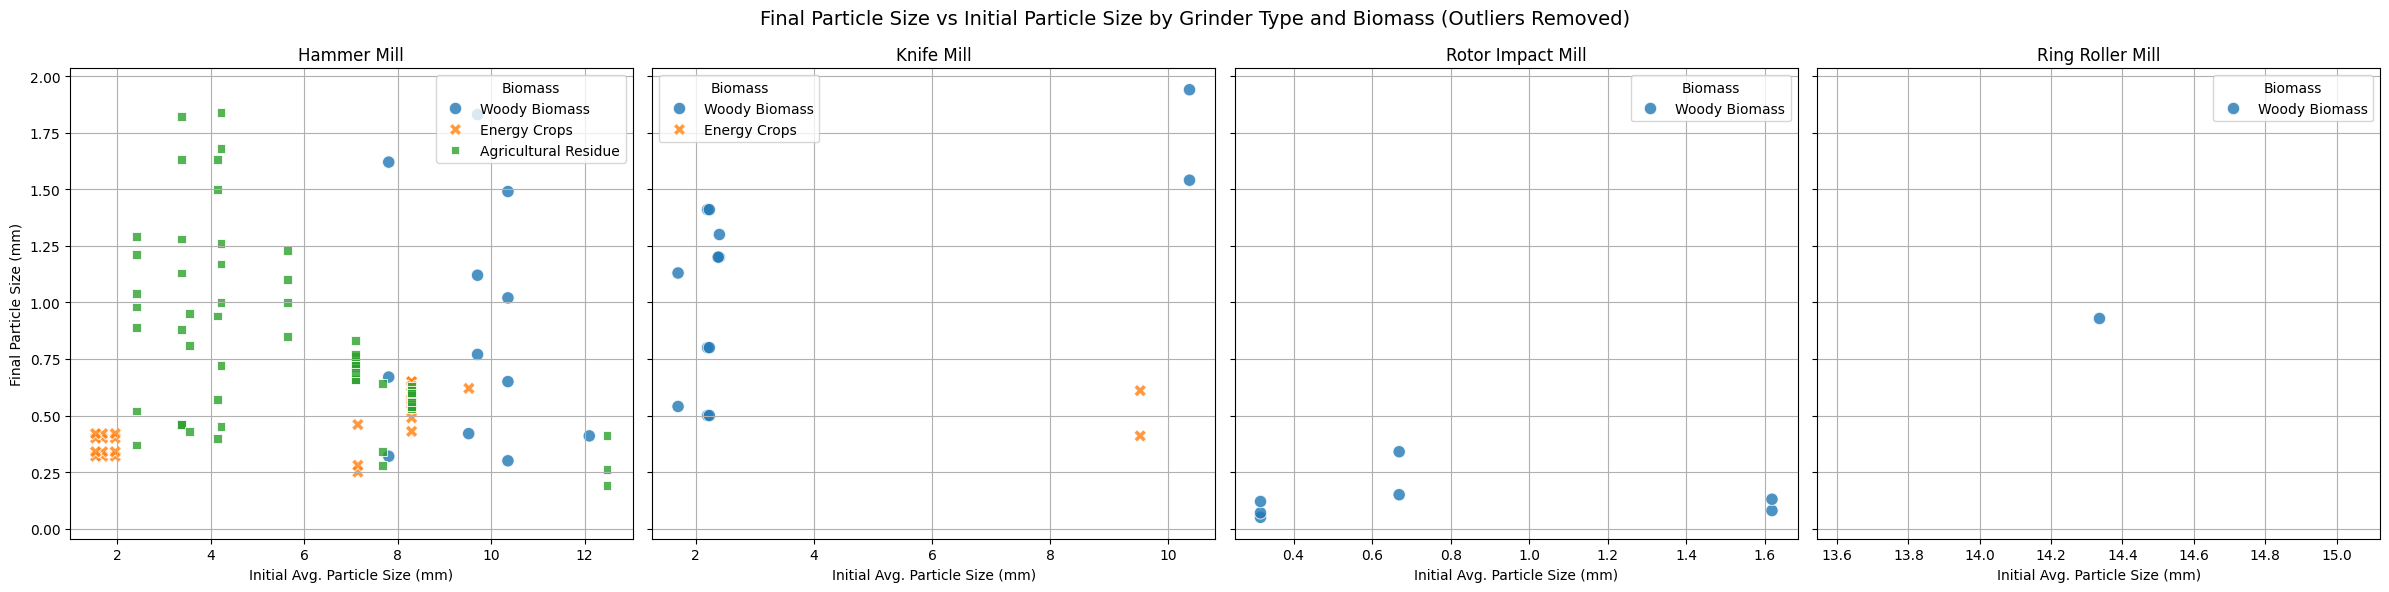

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# --- Data cleaning ---
plot_df = df.dropna(subset=[
    "Initial avg. particle size, (mm)",
    "Final particle size (mm)",
    "Grinder type",
    "Biomass"
])

# Standardize text
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Remove outliers from both numeric columns ---
plot_df = remove_outliers_iqr(plot_df, "Initial avg. particle size, (mm)")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type with legends ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Initial avg. particle size, (mm)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Initial Avg. Particle Size (mm)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Initial Particle Size by Grinder Type and Biomass (Outliers Removed)", fontsize=14)
plt.tight_layout()
plt.show()


In [59]:
df.groupby("Grinder type")[["Feed rate (g/s)", "Final particle size (mm)"]].count()

Feed rate (g/s)  Final particle size (mm)
Grinder type                                                      
CHOPPER                                0                         8
HAMMER MILL                           86                       137
KNIFE MILL                            14                        60
LAB MILL                               0                         0
MEDALLION (TUB) GRINDER                0                         0
RING ROLLER MILL                       0                         1
ROTOR IMPACT MILL                      0                         7
WHO (TUB) GRINDER                      0                         0

/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2923743799.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2923743799.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


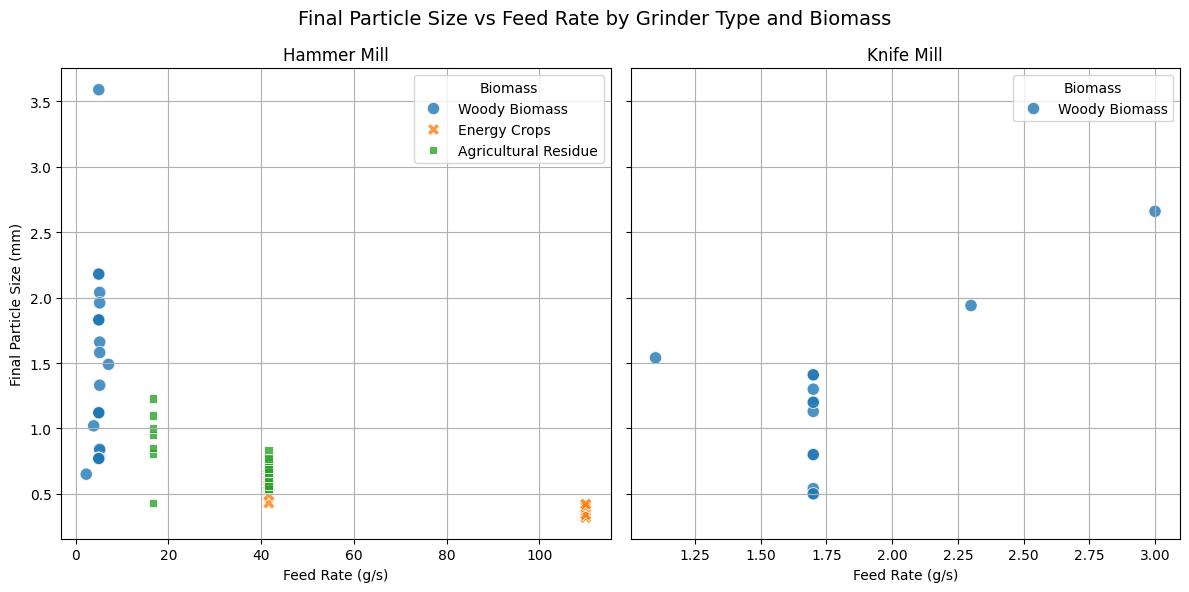

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Feed rate (g/s)", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text columns
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Feed rate (g/s)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Feed Rate (g/s)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Feed Rate by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


In [60]:
df.groupby("Grinder type")[["Motor size, kW", "Final particle size (mm)"]].count()

Motor size, kW  Final particle size (mm)
Grinder type                                                     
CHOPPER                               8                         8
HAMMER MILL                         190                       137
KNIFE MILL                           60                        60
LAB MILL                             15                         0
MEDALLION (TUB) GRINDER               4                         0
RING ROLLER MILL                      1                         1
ROTOR IMPACT MILL                     7                         7
WHO (TUB) GRINDER                    20                         0

/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1839197555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1839197555.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


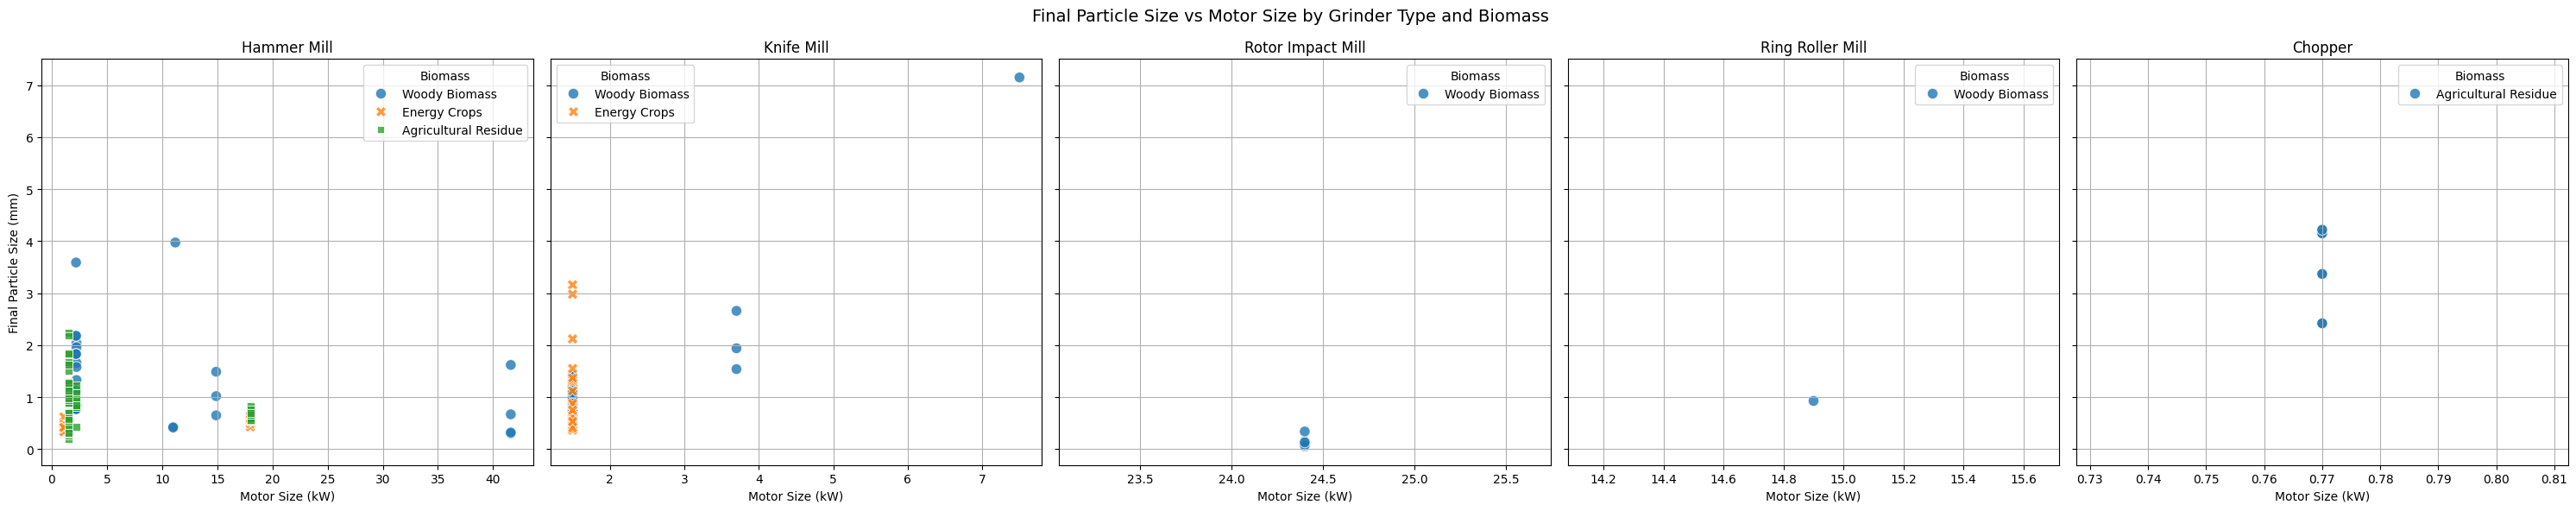

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Motor size, kW", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text columns
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Motor size, kW",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Motor Size (kW)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Motor Size by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/354731899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/354731899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


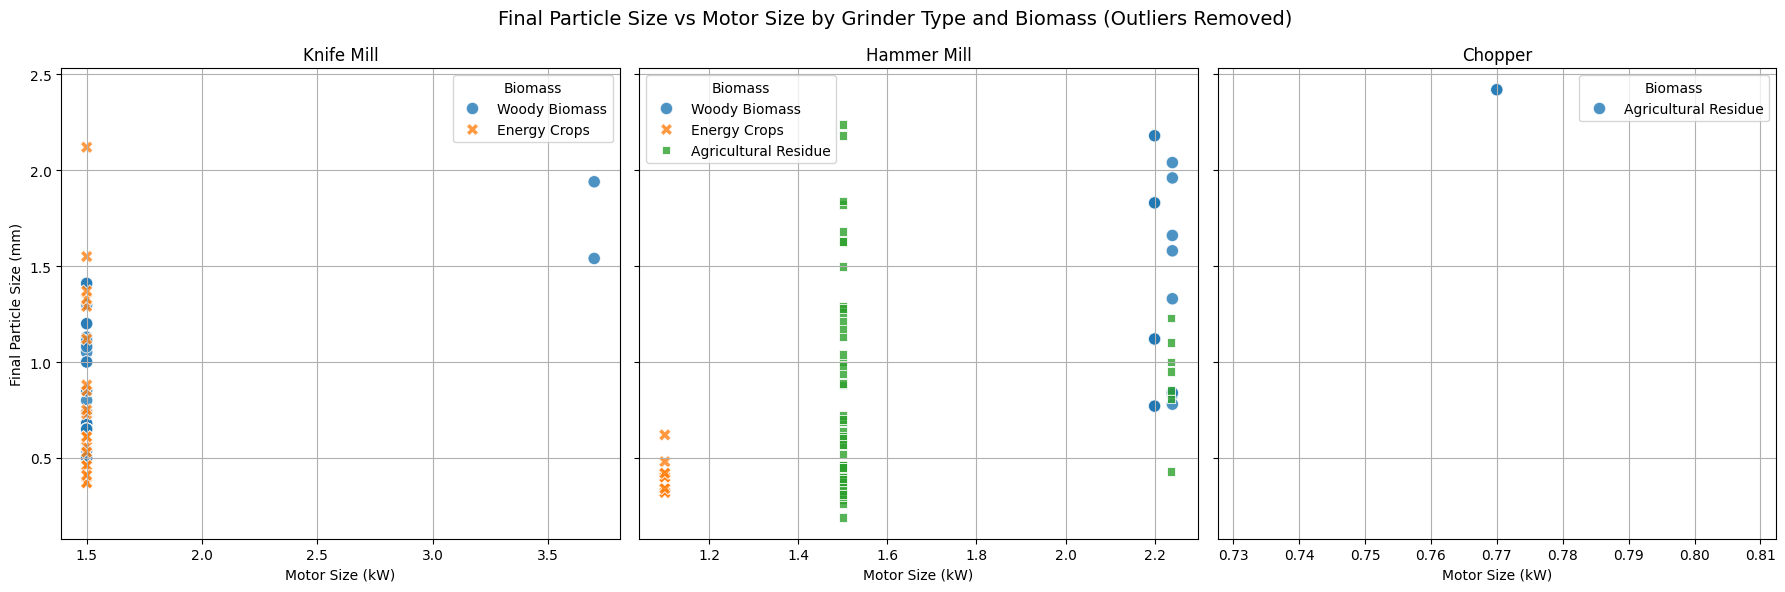

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Motor size, kW", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text columns
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Outlier removal using IQR method ---
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Remove outliers for both columns
plot_df = remove_outliers_iqr(plot_df, "Motor size, kW")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Motor size, kW",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Motor Size (kW)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Motor Size by Grinder Type and Biomass (Outliers Removed)", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1527613217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1527613217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


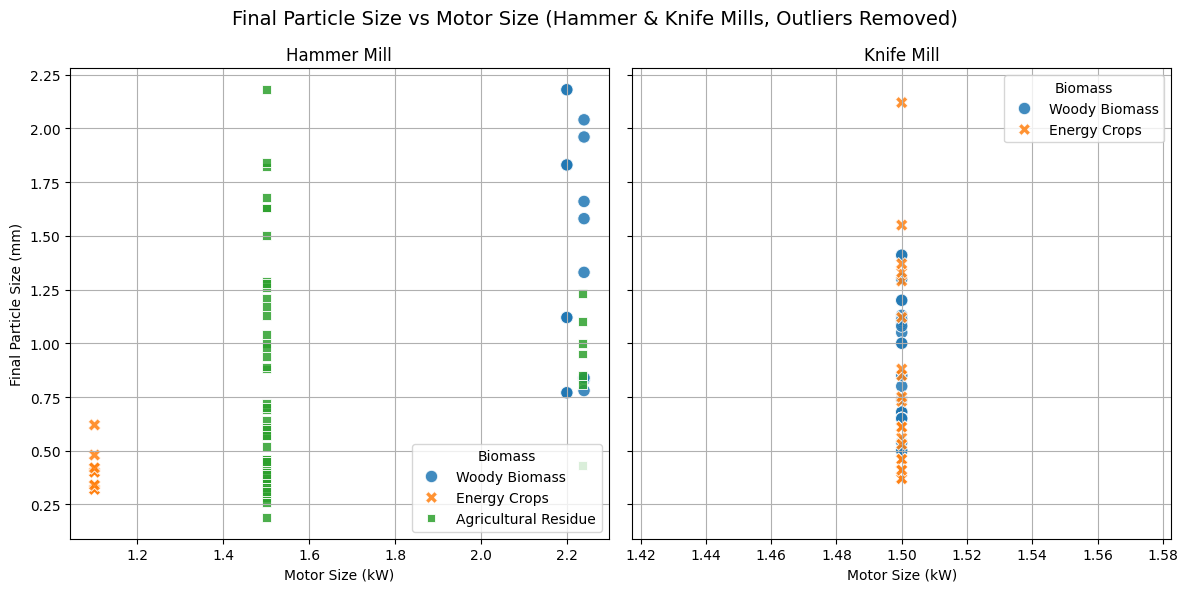

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Motor size, kW", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text columns
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Filter only Hammer Mill and Knife Mill ---
plot_df = plot_df[plot_df["Grinder type"].isin(["Hammer Mill", "Knife Mill"])]

# --- Outlier removal using IQR method ---
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Remove outliers for both numeric columns
plot_df = remove_outliers_iqr(plot_df, "Motor size, kW")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Motor size, kW",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.85,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Motor Size (kW)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Motor Size (Hammer & Knife Mills, Outliers Removed)", fontsize=14)
plt.tight_layout()
plt.show()
